## El Nino-Southern Oscillation (ENSO) impacts on FOREX trading 

ENSO est l'un des phénomènes climatiques les plus importants sur Terre en raison de sa capacité à modifier la circulation atmosphérique mondiale, qui à son tour influence la température et les précipitations à travers le monde. Il a trois états/phases, El Niño, La Niña, Neutre.

El Niño : Un réchauffement de la surface de l'océan, ou des températures de surface de la mer (SST) supérieures à la moyenne, dans le centre et l'est de l'océan Pacifique tropical

La Niña : Un refroidissement de la surface de l'océan, ou des températures de surface de la mer (SST) inférieures à la moyenne, dans le centre et l'est de l'océan Pacifique tropical

Neutre : SST moyenne du Pacifique tropical

### Problème

Nous utilisons ici les données ENSO pour étudier l'effet des fortes températures sur le  volume FOREX. Par manque de données de températures, nous utilisons les données ENSO. 

Nous l'utilisons car C'est l'un des principaux moteurs de la variabilité climatique interannuelle de la Terre et peut provoquer un large éventail d'anomalies climatiques. Les impacts comprennent les catastrophes naturelles (inondations, sécheresses), les rendements agricoles faibles et élevés, la fluctuation des prix, la demande d'énergie, la disponibilité des ressources en eau, les mouvements d'animaux et bien d'autres.

### Indicateurs ENSO 

Air Pressured Indexes - SOI

SOI > 0.5 → Warm Phase → El Niño

SOI < 0.5 → Cool Phase → La Niña

Sea Surface Temperature Indexes - NINO 1+2, NINO 3, NINO 3.4, NINO 4, ONI (NOAA official ENSO indicator)

Outgoing Longwave Radiation Indexes - OLR

Wind Indexes

### Méthodes 

Financial Econometrics method

Binning method

Event study– to what extent does market activity decrease on days with El Nino?

### Données 

El Nino-Southern Oscillation (ENSO) 

FOREX
(Le Forex (en anglais Foreign exchange market ou FX), ou marché des changes, est le marché sur lequel les devises dites convertibles (paire de devises) sont échangées l’une contre l’autre à des taux de change qui varient en permanence.)

## PARTIE 1  : PACKAGES & REPERTOIRE  

### 1 - Import des Libraries 

In [181]:
import pandas as pd                  # to create a DataFrame tableau 
import pandas_datareader.data as web # package that allows us to create a pandas DataFrame object by using various data sources from the internet.
import numpy as np                   # calcul scientifique 
import datetime as dt                # traiter les dates 
import matplotlib.pyplot as plt      # ajouter des éléments tels que des lignes, des images ou des textes aux axes d'un graphique
from matplotlib import style         # tracer et visualiser des données sous formes de graphiques.
style.use ('ggplot')                 # tracer des fonctions 
import os

In [182]:
pd.options.mode.chained_assignment = None  # default='warn' # pour éviter les warnings

# stationarité 
from pandas import read_csv
from matplotlib import pyplot
%matplotlib inline

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import yfinance as yf
from pandas import Series
import seaborn as sns
import plotly.graph_objects as go
from pylab import rcParams  # to  customize Matplotlib

from statsmodels.tsa.stattools import adfuller  # pour le test de dickey Fuller 

### 2 - Répertoire de travail

In [183]:
# Connaître l'emplacement de base
os.getcwd()

'C:\\Users\\dell\\Desktop\\Nouveau dossier\\MASTER 2021 2023\\M2IFM\\S2M2\\MEMOIRE\\DATA'

In [184]:
# path 

path="C:/Users/dell/Desktop/Nouveau dossier/MASTER 2021 2023/M2IFM/S2M2\MEMOIRE/DATA/"
os.chdir(path)
path

'C:/Users/dell/Desktop/Nouveau dossier/MASTER 2021 2023/M2IFM/S2M2\\MEMOIRE/DATA/'

In [185]:
# Connaître le contenu de notre répertoire
os.listdir()

['codeglobalwarming.R',
 'data_oni_forex.xlsx',
 'livrable_B.xlsx',
 'Models.xlsx',
 'OLS_Regression.xlsx',
 'studystats.xlsx',
 'studystatSs.xlsx',
 'volumedata.xlsx']

## PARTIE 2 :  READ THE DATA

In [186]:
### -Données ONI 
oni = pd.read_excel(path+"data_oni_forex.xlsx",sheet_name="Tempyet")
oni = oni.iloc[:,[6,5,7,1,3,0]]
oni.head(5)

,DATE,Year,SEASON,ONI,Phase,dSST3.4
0,2001-01-01,2001,djf,-0.680000,Cool Phase/La Nina,-0.63
1,2001-02-01,2001,jfm,-0.516667,Cool Phase/La Nina,-0.53
2,2001-03-01,2001,fma,-0.436667,Neutral Phase,-0.39
3,2001-04-01,2001,mam,-0.340000,Neutral Phase,-0.39
4,2001-05-01,2001,amj,-0.246667,Neutral Phase,-0.24


In [187]:
### - Données FOREX volumes par pays 
forex_volumes = pd.read_excel(path+"volumedata.xlsx",sheet_name="VOLUMESPAYS")
forex_volumes.head(5)

,DATE,SOUTH_AFRICA,AUSTRALIA,CHILE,EUROPA
0,2001-01-01,8.946375,8.509363,9.697622,9.626301
1,2001-02-01,8.950403,8.462948,9.700991,9.659232
2,2001-03-01,8.946635,8.326033,9.704351,9.170677
3,2001-04-01,8.946245,8.639411,9.707169,8.807946
4,2001-05-01,8.938400,8.762959,9.709724,8.848259


In [188]:
###  - Données FOREX EUROPE 
forex_Europ = pd.read_excel(path+"volumedata.xlsx",sheet_name="EUROPE")
### Fusion 
forex_Europe=pd.merge(forex_Europ,oni,on="DATE") 
forex_Europe.head(5)

,DATE,ASK,BID,SPREAD,VOLUME,LnVOLUME,volatilityeu,Year,SEASON,ONI,Phase,dSST3.4
0,2001-01-01,0.939697,0.940119,0.000423,15158.258065,9.626301,0.000000,2001,djf,-0.680000,Cool Phase/La Nina,-0.63
1,2001-02-01,0.921614,0.922032,0.000418,15665.750000,9.659232,0.001084,2001,jfm,-0.516667,Cool Phase/La Nina,-0.53
2,2001-03-01,0.909348,0.909732,0.000384,9611.129032,9.170677,0.238686,2001,fma,-0.436667,Neutral Phase,-0.39
3,2001-04-01,0.892967,0.893367,0.000400,6687.166667,8.807946,0.131574,2001,mam,-0.340000,Neutral Phase,-0.39
4,2001-05-01,0.875506,0.875942,0.000435,6962.258065,8.848259,0.001625,2001,amj,-0.246667,Neutral Phase,-0.24


In [189]:
###  - Données FOREX S_AFRICA 
forex_Safric = pd.read_excel(path+"volumedata.xlsx",sheet_name="S-AFRICA")
### Fusion 
forex_Safrica=pd.merge(forex_Safric,oni,on="DATE") 
forex_Safrica.tail(5)

,DATE,ASK,BID,Spread,Volume,LnVolume,volatilitysa,Year,SEASON,ONI,Phase,dSST3.4
139,2012-08-01,0.12915,0.12933,0.00018,49991,10.819598,0.000147,2012,jas,0.366667,Neutral Phase,0.47
140,2012-09-01,0.13017,0.13058,0.00041,50979,10.839169,0.000383,2012,aso,0.370000,Neutral Phase,0.38
141,2012-10-01,0.13426,0.13449,0.00023,50678,10.833247,0.000035,2012,son,0.263333,Neutral Phase,0.26
142,2012-11-01,0.13014,0.13042,0.00028,50813,10.835908,0.000007,2012,ond,0.053333,Neutral Phase,0.15
143,2012-12-01,0.12346,0.12407,0.00061,50753,10.834726,0.000001,2012,ndj,-0.210000,Neutral Phase,-0.25


In [190]:
###  1 - Données FOREX CHILE 
forex_Chily = pd.read_excel(path+"volumedata.xlsx",sheet_name="CHILE")
### Fusion
forex_Chile=pd.merge(forex_Chily,oni,on="DATE") 
forex_Chile.head(5)

,DATE,ASK,BID,Spread,Volume,LnVolume,volatilitych,Year,SEASON,ONI,Phase,dSST3.4
0,2001-01-01,0.17801,0.17801,0.0,16278.848065,9.697622,0.000000,2001,djf,-0.680000,Cool Phase/La Nina,-0.63
1,2001-02-01,0.17468,0.17468,0.0,16333.792143,9.700991,0.000011,2001,jfm,-0.516667,Cool Phase/La Nina,-0.53
2,2001-03-01,0.16785,0.16785,0.0,16388.752258,9.704351,0.000011,2001,fma,-0.436667,Neutral Phase,-0.39
3,2001-04-01,0.16643,0.16643,0.0,16435.005333,9.707169,0.000008,2001,mam,-0.340000,Neutral Phase,-0.39
4,2001-05-01,0.16367,0.16367,0.0,16477.048387,9.709724,0.000007,2001,amj,-0.246667,Neutral Phase,-0.24


In [191]:
### 1 - Données FOREX AUSTRALIA
forex_Australi = pd.read_excel(path+"volumedata.xlsx",sheet_name="AUSTRALIA")
### Fusion 
forex_Australia=pd.merge(forex_Australi,oni,on="DATE") 
forex_Australia.head(5)

,DATE,ASK,BID,Spread,Volume,LnVolume,volatilityau,Year,SEASON,ONI,Phase,dSST3.4
0,2001-01-01,0.6464,0.64624,0.00016,4961.0,8.509363,0.000000,2001,djf,-0.680000,Cool Phase/La Nina,-0.63
1,2001-02-01,0.6464,0.64624,0.00016,4736.0,8.462948,0.002154,2001,jfm,-0.516667,Cool Phase/La Nina,-0.53
2,2001-03-01,0.6464,0.64624,0.00016,4130.0,8.326033,0.018746,2001,fma,-0.436667,Neutral Phase,-0.39
3,2001-04-01,0.6464,0.64624,0.00016,5650.0,8.639411,0.098206,2001,mam,-0.340000,Neutral Phase,-0.39
4,2001-05-01,0.6464,0.64624,0.00016,6393.0,8.762959,0.015264,2001,amj,-0.246667,Neutral Phase,-0.24


In [192]:
### Fusion bases Données ONI & Données FOREX volumes par pays
forexoni=pd.merge(forex_volumes,oni,on="DATE") 
forexoni.head(5) 

,DATE,SOUTH_AFRICA,AUSTRALIA,CHILE,EUROPA,Year,SEASON,ONI,Phase,dSST3.4
0,2001-01-01,8.946375,8.509363,9.697622,9.626301,2001,djf,-0.680000,Cool Phase/La Nina,-0.63
1,2001-02-01,8.950403,8.462948,9.700991,9.659232,2001,jfm,-0.516667,Cool Phase/La Nina,-0.53
2,2001-03-01,8.946635,8.326033,9.704351,9.170677,2001,fma,-0.436667,Neutral Phase,-0.39
3,2001-04-01,8.946245,8.639411,9.707169,8.807946,2001,mam,-0.340000,Neutral Phase,-0.39
4,2001-05-01,8.938400,8.762959,9.709724,8.848259,2001,amj,-0.246667,Neutral Phase,-0.24


In [193]:
forexoni.set_index("DATE", inplace =True)
forexoni

,SOUTH_AFRICA,AUSTRALIA,CHILE,EUROPA,Year,SEASON,ONI,Phase,dSST3.4
DATE,,,,,,,,,
2001-01-01,8.946375,8.509363,9.697622,9.626301,2001,djf,-0.680000,Cool Phase/La Nina,-0.63
2001-02-01,8.950403,8.462948,9.700991,9.659232,2001,jfm,-0.516667,Cool Phase/La Nina,-0.53
2001-03-01,8.946635,8.326033,9.704351,9.170677,2001,fma,-0.436667,Neutral Phase,-0.39
2001-04-01,8.946245,8.639411,9.707169,8.807946,2001,mam,-0.340000,Neutral Phase,-0.39
2001-05-01,8.938400,8.762959,9.709724,8.848259,2001,amj,-0.246667,Neutral Phase,-0.24
...,...,...,...,...,...,...,...,...,...
2012-08-01,10.819598,12.720700,10.066939,12.078336,2012,jas,0.366667,Neutral Phase,0.47
2012-09-01,10.839169,12.539367,10.067424,11.989861,2012,aso,0.370000,Neutral Phase,0.38
2012-10-01,10.833247,12.747969,10.067934,11.867182,2012,son,0.263333,Neutral Phase,0.26


### Data Understanding


### Data Visualization 

In [152]:
# Installation de plotly pour la visualisation interactive 
#!pip install plotly

In [153]:
# FOREX VOLUME interactive time series
#import plotly.express as px 
#plot = px.line(data_frame=forexoni, y='EUROPA', color='Year', template="simple_white", labels={'Date':'Time'}, 
#title=" EUROPA FOREX VOLUME Changes Over Time")
#plot.show()

In [166]:
# ONI interactive time series
plot = px.line(data_frame=forexoni, y='ONI', labels={'Date':'Time'},)
#               title='ONI changes over time')
plot.show()

In [170]:
# ONI interactive time series
import plotly.express as px 
plot = px.line(data_frame=forexoni, y='ONI', color='Year',  labels={'Date':'Time'},) 
#title="ONI Changes Over Time")
plot.show()

In [161]:
# libraries
import matplotlib
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM, TimeDistributed
#from tensorflow.keras.metrics import RootMeanSquaredError

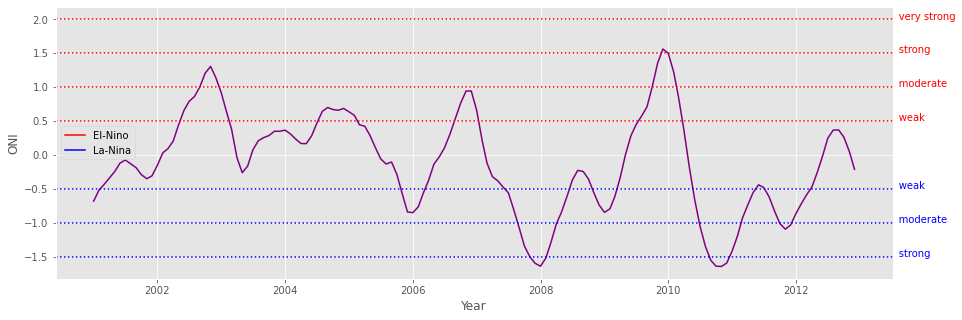

In [172]:
# ONI and ENSO relation

plt.figure(figsize=(15, 5))

# convert dates to numbers to get x-axis range
x = matplotlib.dates.date2num(forexoni.index)

# plot Year and ONI
plt.plot(forexoni.ONI, color='purple')
plt.xlabel('Year')
plt.ylabel('ONI')
#plt.title('ENSO and ONI Relation')

# add horizontal lines and labels to define ENSO phase and intensity

plt.axhline(y=2, color='r', linestyle=':')
plt.text(x=x[-1], y=2, color='red', s='              very strong')

plt.axhline(y=1.5, color='r', linestyle=':')
plt.text(x=x[-1], y=1.5, color='red', s='              strong')

plt.axhline(y=1, color='r', linestyle=':')
plt.text(x[-1], 1, color='r', s='              moderate')

plt.axhline(y=0.5, color='r', linestyle=':')
plt.text(x[-1], 0.5, color='r', s='              weak')

plt.axhline(y=-0.5, color='b', linestyle=':')
plt.text(x[-1], -0.5, color='b', s='              weak')

plt.axhline(y=-1, color='b', linestyle=':')
plt.text(x[-1], -1, color='b', s='              moderate')

plt.axhline(y=-1.5, color='b', linestyle=':')
plt.text(x[-1], -1.5, color='b', s='              strong')

# custom legends
line_red = matplotlib.lines.Line2D([0], [0], label='El-Nino', color='r')
line_blue = matplotlib.lines.Line2D([0], [0], label='La-Nina', color='b')
plt.legend(handles=[line_red, line_blue])

plt.show()

## NORMALIZE

In [29]:
data = forexoni.iloc[:,[1,2,3,4,7]]
data.head(5)

,SOUTH_AFRICA,AUSTRALIA,CHILE,EUROPA,ONI
0,8.946375,8.509363,9.697622,9.626301,-0.680000
1,8.950403,8.462948,9.700991,9.659232,-0.516667
2,8.946635,8.326033,9.704351,9.170677,-0.436667
3,8.946245,8.639411,9.707169,8.807946,-0.340000
4,8.938400,8.762959,9.709724,8.848259,-0.246667


In [30]:
avgs = data.mean()
devs = data.std()
for col in data.columns:
    data[col] = (data[col] - avgs.loc[col]) / devs.loc[col]

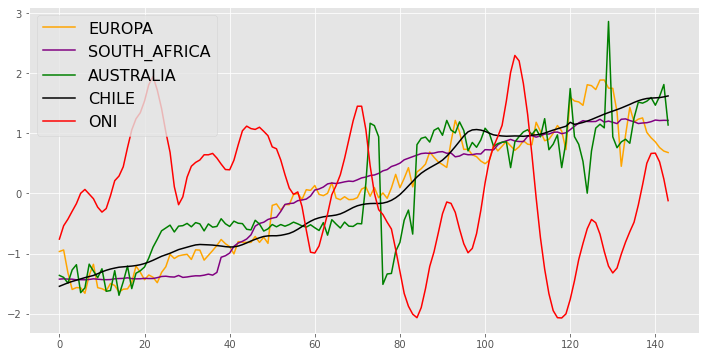

In [112]:
plt.figure(figsize=(12,6))
euro, = plt.plot(data['EUROPA'],color='orange')
rand, = plt.plot(data['SOUTH_AFRICA'],color='purple')
aud, = plt.plot(data['AUSTRALIA'],color='green')
peso, = plt.plot(data['CHILE'],color='black')
tempe, = plt.plot(data['ONI'], color='red')
plt.legend(['EUROPA','SOUTH_AFRICA','AUSTRALIA','CHILE', 'ONI'], fontsize=16)

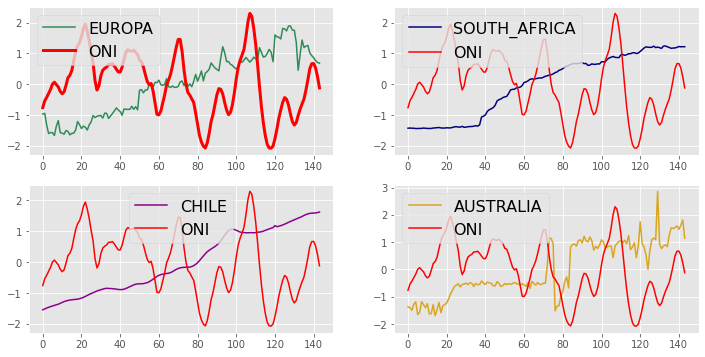

In [113]:
plt.figure(figsize=(12,6))
plt.subplot(221)
euro, = plt.plot(data['EUROPA'],'seagreen')
tempe, = plt.plot(data['ONI'], 'r', linewidth=3)
plt.legend(['EUROPA', 'ONI'], fontsize=16)

plt.subplot(222)
rand, = plt.plot(data['SOUTH_AFRICA'],color='navy')
tempe, = plt.plot(data['ONI'], color='red')
plt.legend(['SOUTH_AFRICA', 'ONI'], fontsize=16)

plt.subplot(223)
peso, = plt.plot(data['CHILE'],color='darkmagenta')
tempe, = plt.plot(data['ONI'], color='red')
plt.legend(['CHILE', 'ONI'], fontsize=16)

plt.subplot(224)
peso, = plt.plot(data['AUSTRALIA'],color='goldenrod')
tempe, = plt.plot(data['ONI'], color='red')
plt.legend(['AUSTRALIA', 'ONI'], fontsize=16)


## PARTIE 3 : TRAITEMENT DES DONNEES

### 1 - Data pre processing

In [114]:
forexoni.dtypes

DATE            datetime64[ns]
SOUTH_AFRICA           float64
AUSTRALIA              float64
CHILE                  float64
EUROPA                 float64
Year                     int64
SEASON                  object
ONI                    float64
Phase                   object
dSST3.4                float64
dtype: object

In [115]:
# Nombre d'obersation 
forexoni.Year.count()

144

In [116]:
# affichage du shape 
forexoni.shape

(144, 10)

In [117]:
# avons nous des valeurs manquantes dans la base?

forexoni.isna().sum()

DATE            0
SOUTH_AFRICA    0
AUSTRALIA       0
CHILE           0
EUROPA          0
Year            0
SEASON          0
ONI             0
Phase           0
dSST3.4         0
dtype: int64

### Observations

rows = 144, columns =11

Data from 2001-2012

Data isn't normalized

## PARTIE 4 : ETUDES STATISTIQUES

### 4.1 - Analyse Univariée 

In [118]:
# statisques descriptive sur TEMPMAX
forexoni['Phase'].describe()

count               144
unique                3
top       Neutral Phase
freq                 71
Name: Phase, dtype: object

### 4.2 Analyse bivariée

In [119]:
forexoni['Monthname'] = forexoni['DATE'].dt.month_name()
forexoni["Whole"]=np.where((forexoni["Year"]>2000) & (forexoni["Year"]<2013),"WHOLE","")
forexoni.head()

,DATE,SOUTH_AFRICA,AUSTRALIA,CHILE,EUROPA,Year,SEASON,ONI,Phase,dSST3.4,Monthname,Whole
0,2001-01-01,8.946375,8.509363,9.697622,9.626301,2001,djf,-0.680000,Cool Phase/La Nina,-0.63,January,WHOLE
1,2001-02-01,8.950403,8.462948,9.700991,9.659232,2001,jfm,-0.516667,Cool Phase/La Nina,-0.53,February,WHOLE
2,2001-03-01,8.946635,8.326033,9.704351,9.170677,2001,fma,-0.436667,Neutral Phase,-0.39,March,WHOLE
3,2001-04-01,8.946245,8.639411,9.707169,8.807946,2001,mam,-0.340000,Neutral Phase,-0.39,April,WHOLE
4,2001-05-01,8.938400,8.762959,9.709724,8.848259,2001,amj,-0.246667,Neutral Phase,-0.24,May,WHOLE


### PANEL A

In [120]:
# NUMBER OF HOT DAYS 
livrable_A = pd.crosstab(forexoni["Year"],forexoni["Phase"])
livrable_A

Phase,Cool Phase/La Nina,Neutral Phase,Warm Phase/El Nino
Year,,,
2001,2,10,0
2002,0,5,7
2003,0,10,2
2004,0,7,5
2005,2,8,2
2006,3,5,4
2007,6,5,1
2008,8,4,0
2009,3,4,5


### PANEL B / ONI TEMPERATURE

In [121]:
#panel b codes 1
STAT1  = forexoni.groupby(['Year'] ).agg({'DATE' : 'count'})
STAT2  = forexoni.groupby(['Year'] ).agg({'ONI' : np.mean})
STAT3  = forexoni.groupby(['Year'] ).agg({'ONI' : np.std})
STAT4  = forexoni.groupby(['Year'] ).agg({'ONI' : min})
STAT5  = forexoni.groupby(['Year'] ).agg({'ONI' : max})

# Différentes fusions des stats
livrable_B=pd.merge(STAT1,STAT2,on="Year",how="left")
livrable_B=pd.merge(livrable_B,STAT3,on="Year",how="left")
livrable_B=pd.merge(livrable_B,STAT4,on="Year",how="left")
livrable_B=pd.merge(livrable_B,STAT5,on="Year",how="left")

livrable_B

C:\Users\dell\AppData\Local\Temp/ipykernel_15876/3850284773.py:12: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'ONI_x'} in the result is deprecated and will raise a MergeError in a future version.



,DATE,ONI_x,ONI_y,ONI_x,ONI_y
Year,,,,,
2001,12,-0.306389,0.176363,-0.680000,-0.073333
2002,12,0.631667,0.499854,-0.150000,1.306667
2003,12,0.249444,0.326666,-0.260000,0.916667
2004,12,0.446944,0.214728,0.166667,0.700000
2005,12,0.041389,0.461203,-0.840000,0.636667
2006,12,0.073611,0.637887,-0.850000,0.943333
2007,12,-0.608056,0.690398,-1.596667,0.656667
2008,12,-0.782222,0.488292,-1.640000,-0.226667
2009,12,0.280556,0.814657,-0.846667,1.563333


In [122]:
# Définissons une Fonction permettant de renommer les colonnes

def livrableB (livrable_B,var1, var2,var3,var4,var5):
    livrable_B = livrable_B.rename(columns={var1 : "N",var2 :"MEAN",var3 : "s.d",var4 : "MIN",var5 : "MAX"},inplace=True)
livrableB (livrable_B,'DATE','ONI_x','ONI_y','ONI_x','ONI_y')
livrable_B

,N,MIN,MAX,MIN,MAX
Year,,,,,
2001,12,-0.306389,0.176363,-0.680000,-0.073333
2002,12,0.631667,0.499854,-0.150000,1.306667
2003,12,0.249444,0.326666,-0.260000,0.916667
2004,12,0.446944,0.214728,0.166667,0.700000
2005,12,0.041389,0.461203,-0.840000,0.636667
2006,12,0.073611,0.637887,-0.850000,0.943333
2007,12,-0.608056,0.690398,-1.596667,0.656667
2008,12,-0.782222,0.488292,-1.640000,-0.226667
2009,12,0.280556,0.814657,-0.846667,1.563333


In [123]:
# Covertion de notre fichier final au format excel
x = "C:/Users/dell/Desktop/Nouveau dossier/MASTER 2021 2023/M2IFM/S2M2/MEMOIRE/DATA/"

livrable_B.to_excel(x+"livrable_B.xlsx",sheet_name="livrable_Bresults")

In [124]:
livrable_B = pd.read_excel(path+"livrable_B.xlsx",sheet_name="livrable_Bresults")
# PANEL B avec la variable Whole
agg_pop = forexoni.groupby("Whole", as_index=False)
all0     = agg_pop["ONI"].agg({"N" : 'count'})
all1     = agg_pop["ONI"].agg({"MEAN" : np.mean})
all2     = agg_pop["ONI"].agg({"s.d" : np.std})
all3     = agg_pop["ONI"].agg({"MIN" : min})
all4     = agg_pop["ONI"].agg({"MAX" : max})

livra_W  = pd.merge(all0,all1,on="Whole",how="left")
livra_W  = pd.merge(livra_W,all2,on="Whole",how="left")
livra_W  = pd.merge(livra_W,all3,on="Whole",how="left")
livra_W  = pd.merge(livra_W,all4,on="Whole",how="left")

livra_W.head()

,Whole,N,MEAN,s.d,MIN,MAX
0,WHOLE,144,-0.12213,0.73388,-1.643333,1.563333


In [125]:
# rénomme ma nouvelle base
PANEL = livra_W
# Fusion des tableaux pour obtenir whole et les yearcategory
PANEL = pd.concat([livrable_B, livra_W],ignore_index=False)
PANEL

,Year,N,MIN,MAX,MIN.1,MAX.1,Whole,MEAN,s.d
0,2001.0,12,-0.306389,0.176363,-0.680000,-0.073333,NaN,NaN,NaN
1,2002.0,12,0.631667,0.499854,-0.150000,1.306667,NaN,NaN,NaN
2,2003.0,12,0.249444,0.326666,-0.260000,0.916667,NaN,NaN,NaN
3,2004.0,12,0.446944,0.214728,0.166667,0.700000,NaN,NaN,NaN
4,2005.0,12,0.041389,0.461203,-0.840000,0.636667,NaN,NaN,NaN
5,2006.0,12,0.073611,0.637887,-0.850000,0.943333,NaN,NaN,NaN
6,2007.0,12,-0.608056,0.690398,-1.596667,0.656667,NaN,NaN,NaN
7,2008.0,12,-0.782222,0.488292,-1.640000,-0.226667,NaN,NaN,NaN
8,2009.0,12,0.280556,0.814657,-0.846667,1.563333,NaN,NaN,NaN
9,2010.0,12,-0.478889,1.188199,-1.643333,1.496667,NaN,NaN,NaN


In [126]:
# suppresion de Whole
PANEL_B = PANEL.iloc[:,[0,1,2,3,4,5]]
# Tableau panel B
PANEL_B.rename(index={"NaN":'whole period'},inplace=True)
PANEL_B

,Year,N,MIN,MAX,MIN.1,MAX.1
0,2001.0,12,-0.306389,0.176363,-0.680000,-0.073333
1,2002.0,12,0.631667,0.499854,-0.150000,1.306667
2,2003.0,12,0.249444,0.326666,-0.260000,0.916667
3,2004.0,12,0.446944,0.214728,0.166667,0.700000
4,2005.0,12,0.041389,0.461203,-0.840000,0.636667
5,2006.0,12,0.073611,0.637887,-0.850000,0.943333
6,2007.0,12,-0.608056,0.690398,-1.596667,0.656667
7,2008.0,12,-0.782222,0.488292,-1.640000,-0.226667
8,2009.0,12,0.280556,0.814657,-0.846667,1.563333
9,2010.0,12,-0.478889,1.188199,-1.643333,1.496667


### 4.3 Volume and Temperature statistics 

#### EUROPE

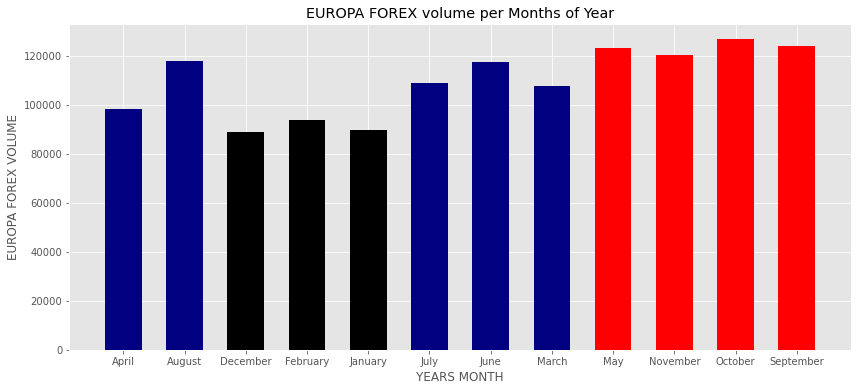

In [127]:
### EUROPE forex volume per month 
forex_Europe['Monthname'] = forex_Europe['DATE'].dt.month_name()
forex_Europe["Whole"]=np.where((forex_Europe["Year"]>2000) & (forex_Europe["Year"]<2013),"WHOLE","")

### Statistiques de  EUROPA ForexVolume par mois de l'année 
Barca_month = forex_Europe.groupby("Monthname",as_index=False)
Barca1 = Barca_month ["VOLUME"].agg({"total_vol" : 'sum'})
Barca2 = Barca_month ["VOLUME"].agg({"Mean_vol" : np.mean})

livra_Barca  = pd.merge(Barca1,Barca2,on="Monthname",how="left")
livra_Barca.sort_values(by="total_vol",ascending=False)

# Création des colonnes
M_volume = livra_Barca.Mean_vol
Yearmonth = livra_Barca.Monthname 

# Représentation Graphique
plt.figure(figsize=(14,6))
color = ['navy','navy','black','black','black','navy','navy','navy','red','red','red','red']
plt.bar(Yearmonth,M_volume,color=color, width=0.6)
plt.xlabel("YEARS MONTH")
plt.ylabel("EUROPA FOREX VOLUME")
plt.title('EUROPA FOREX volume per Months of Year')
plt.show()


Transaction volumes are highest in October, September and May, just before and just after the hot summer period. 
on the other hand, volumes are lower in December, February and January.


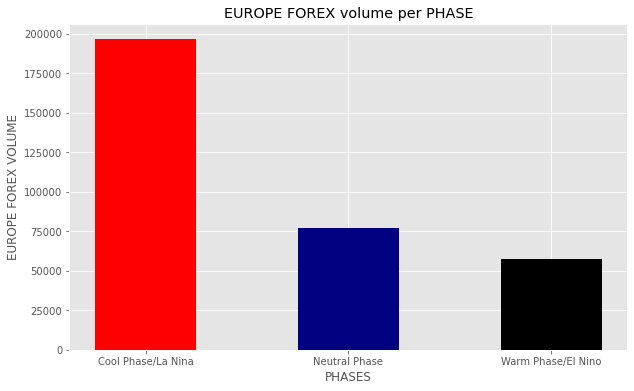

In [128]:
### Statistiques de europa ForexVolume par phase 

Barca_month = forex_Europe.groupby("Phase",as_index=False)
Barca1 = Barca_month ["VOLUME"].agg({"total_vol" : 'sum'})
Barca2 = Barca_month ["VOLUME"].agg({"Mean_vol" : np.mean})

livra_city  = pd.merge(Barca1,Barca2,on="Phase",how="left")
livra_city.sort_values(by="total_vol",ascending=False)

# Création des colonnes
M_volume = livra_city.Mean_vol
phases = livra_city.Phase
# Représentation Graphique
plt.figure(figsize=(10,6))
color = ['red','navy','black']
plt.bar(phases,M_volume,color=color, width=0.5)
plt.xlabel("PHASES")
plt.ylabel("EUROPE FOREX VOLUME")
plt.title('EUROPE FOREX volume per PHASE')
plt.show()


Les volumes de transactions sont plus élevés en périodes de froid (La Nina) suivie de la période normale et très faible en période de chaleur (El Nino)

####  SOUTH AFRICA

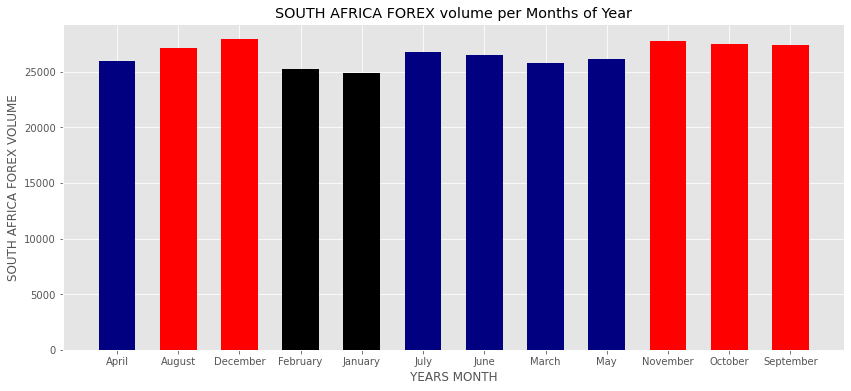

In [129]:
### SOUTH AFRICA forex volume per month
forex_Safrica['Monthname'] = forex_Safrica['DATE'].dt.month_name()
forex_Safrica["Whole"]=np.where((forex_Safrica["Year"]>2000) & (forex_Safrica["Year"]<2013),"WHOLE","")

### Statistiques de  EUROPA ForexVolume par mois de l'année 
Barca_month = forex_Safrica.groupby("Monthname",as_index=False)
Barca1 = Barca_month ["Volume"].agg({"total_vol" : 'sum'})
Barca2 = Barca_month ["Volume"].agg({"Mean_vol" : np.mean})

livra_Barca  = pd.merge(Barca1,Barca2,on="Monthname",how="left")
livra_Barca.sort_values(by="total_vol",ascending=False)

# Création des colonnes
M_volume = livra_Barca.Mean_vol
Yearmonth = livra_Barca.Monthname 

# Représentation Graphique
plt.figure(figsize=(14,6))
color = ['navy','red','red','black','black','navy','navy','navy','navy','red','red','red']
plt.bar(Yearmonth,M_volume,color=color, width=0.6)
plt.xlabel("YEARS MONTH")
plt.ylabel("SOUTH AFRICA FOREX VOLUME")
plt.title('SOUTH AFRICA FOREX volume per Months of Year')
plt.show()

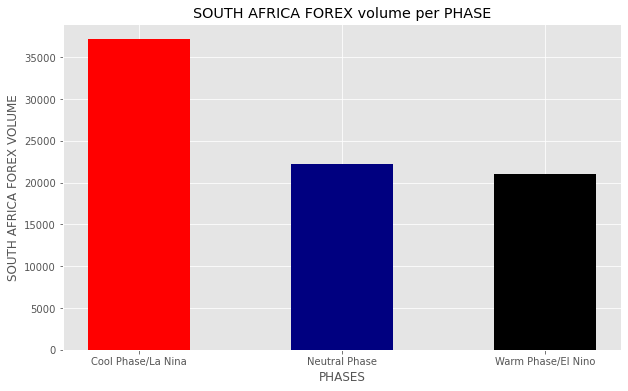

In [130]:
### Statistiques de SOUTH AFRICA ForexVolume par phase 
Barca_month = forex_Safrica.groupby("Phase",as_index=False)
Barca1 = Barca_month ["Volume"].agg({"total_vol" : 'sum'})
Barca2 = Barca_month ["Volume"].agg({"Mean_vol" : np.mean})

livra_city  = pd.merge(Barca1,Barca2,on="Phase",how="left")
livra_city.sort_values(by="total_vol",ascending=False)

# Création des colonnes
M_volume = livra_city.Mean_vol
phases = livra_city.Phase
# Représentation Graphique
plt.figure(figsize=(10,6))
color = ['red','navy','black']
plt.bar(phases,M_volume,color=color, width=0.5)
plt.xlabel("PHASES")
plt.ylabel("SOUTH AFRICA FOREX VOLUME")
plt.title('SOUTH AFRICA FOREX volume per PHASE')
plt.show()

#### AUSTRALIA

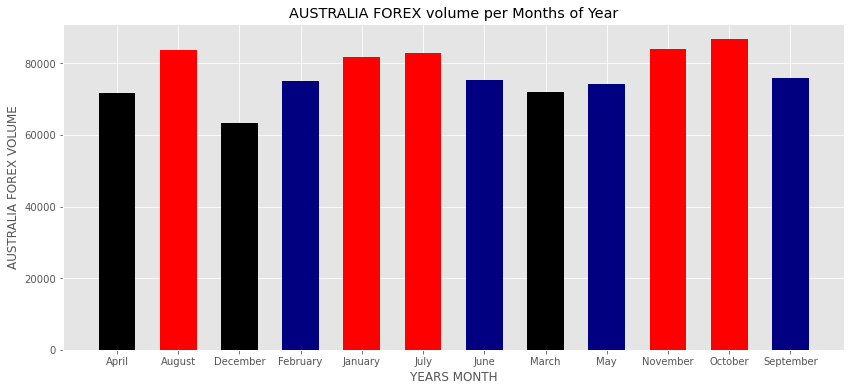

In [131]:
### AUSTRALIA forex volume per month 
forex_Australia['Monthname'] = forex_Australia['DATE'].dt.month_name()
forex_Australia["Whole"]=np.where((forex_Australia["Year"]>2000) & (forex_Australia["Year"]<2013),"WHOLE","")

### Statistiques de  AUSTRALIA ForexVolume par mois de l'année 
Barca_month = forex_Australia.groupby("Monthname",as_index=False)
Barca1 = Barca_month ["Volume"].agg({"total_vol" : 'sum'})
Barca2 = Barca_month ["Volume"].agg({"Mean_vol" : np.mean})

livra_Barca  = pd.merge(Barca1,Barca2,on="Monthname",how="left")
livra_Barca.sort_values(by="total_vol",ascending=False)

# Création des colonnes
M_volume = livra_Barca.Mean_vol
Yearmonth = livra_Barca.Monthname 

# Représentation Graphique
plt.figure(figsize=(14,6))
color = ['black','red','black','navy','red','red','navy','black','navy','red','red','navy']
plt.bar(Yearmonth,M_volume,color=color, width=0.6)
plt.xlabel("YEARS MONTH")
plt.ylabel("AUSTRALIA FOREX VOLUME")
plt.title('AUSTRALIA FOREX volume per Months of Year')
plt.show()

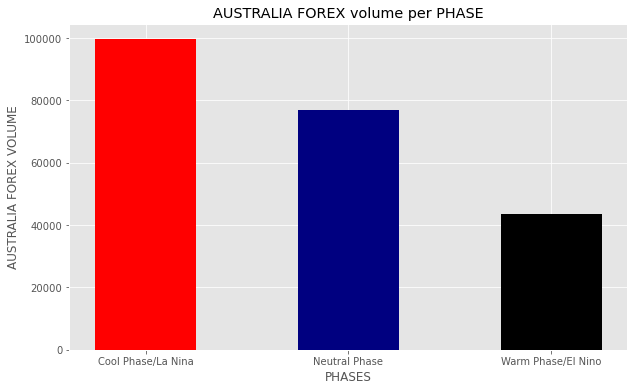

In [132]:
### Statistiques du ForexVolume par phase
Barca_month = forex_Australia.groupby("Phase",as_index=False)
Barca1 = Barca_month ["Volume"].agg({"total_vol" : 'sum'})
Barca2 = Barca_month ["Volume"].agg({"Mean_vol" : np.mean})

livra_city  = pd.merge(Barca1,Barca2,on="Phase",how="left")
livra_city.sort_values(by="total_vol",ascending=False)

# Création des colonnes
M_volume = livra_city.Mean_vol
phases = livra_city.Phase
# Représentation Graphique
plt.figure(figsize=(10,6))
color = ['red','navy','black']
plt.bar(phases,M_volume,color=color, width=0.5)
plt.xlabel("PHASES")
plt.ylabel("AUSTRALIA FOREX VOLUME")
plt.title('AUSTRALIA FOREX volume per PHASE')
plt.show()

#### CHILE

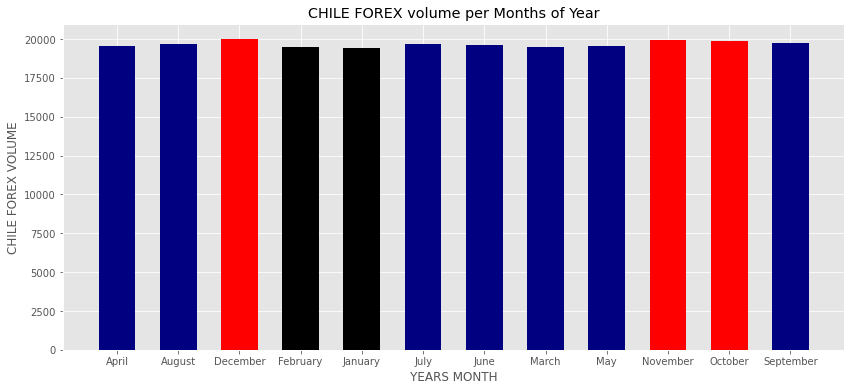

In [255]:
### CHILE forex volume per month 

forex_Chile['Monthname'] = forex_Chile['DATE'].dt.month_name()
forex_Chile["Whole"]=np.where((forex_Chile["Year"]>2000) & (forex_Chile["Year"]<2013),"WHOLE","")

### Statistiques de  CHILIE ForexVolume par mois de l'année 
Barca_month = forex_Chile.groupby("Monthname",as_index=False)
Barca1 = Barca_month['Volume'].agg({"total_vol" : 'sum'})
Barca2 = Barca_month['Volume'].agg({"Mean_vol" : np.mean})

livra_Barca  = pd.merge(Barca1,Barca2,on="Monthname",how="left")
livra_Barca.sort_values(by="total_vol",ascending=False)

# Création des colonnes
M_volume = livra_Barca.Mean_vol
Yearmonth = livra_Barca.Monthname 

# Représentation Graphique
plt.figure(figsize=(14,6))
color = ['navy','navy','red','black','black','navy','navy','navy','navy','red','red','navy']
plt.bar(Yearmonth,M_volume,color=color, width=0.6)
plt.xlabel("YEARS MONTH")
plt.ylabel("CHILE FOREX VOLUME")
plt.title('CHILE FOREX volume per Months of Year')
plt.show()

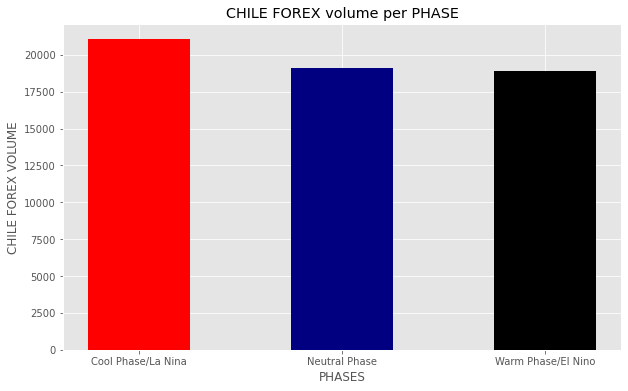

In [134]:
###  CHILE ForexVolume statistics  per phase 
Barca_month = forex_Chile.groupby("Phase",as_index=False)
Barca1 = Barca_month ["Volume"].agg({"total_vol" : 'sum'})
Barca2 = Barca_month ["Volume"].agg({"Mean_vol" : np.mean})

livra_city  = pd.merge(Barca1,Barca2,on="Phase",how="left")
livra_city.sort_values(by="total_vol",ascending=False)

# Création des colonnes
M_volume = livra_city.Mean_vol
phases = livra_city.Phase
# Représentation Graphique
plt.figure(figsize=(10,6))
color = ['red','navy','black']
plt.bar(phases,M_volume,color=color, width=0.5)
plt.xlabel("PHASES")
plt.ylabel("CHILE FOREX VOLUME")
plt.title('CHILE FOREX volume per PHASE')
plt.show()

In [135]:
from scipy.stats import skew
from scipy import stats

### 4.4 Kurtosis/ Mean / std/ Jarque Bera descriptives statistics 

In [177]:

T1=144
T2=144
pays = ["Europa","Volume ","Spread",""
                "South Africa","Volume ","Spread",
                "Australia","Volume ","Spread",
                "Chile ","Volume ","Spread",]
Nonbre   = ["",T1,T1,
            "",T1,T1,
            "",T1,T1,
            "",T1,T1]

Z_test     = pd.Series(["",forex_Europe["VOLUME"].kurtosis(),forex_Europe["SPREAD"].kurtosis(),
                        "",forex_Safrica["Volume"].kurtosis(),forex_Safrica["Spread"].kurtosis(),
                        "",forex_Australia["Volume"].kurtosis(),forex_Australia["Spread"].kurtosis(),
                        "",forex_Chile["Volume"].kurtosis(),forex_Chile["Spread"].kurtosis()],index=pays)

Z_tee     = pd.Series(["",skew(forex_Europe["VOLUME"]),skew(forex_Europe["SPREAD"]),
                        "",skew(forex_Safrica["Volume"]),skew(forex_Safrica["Spread"]),
                       "",skew(forex_Australia["Volume"]),skew(forex_Australia["Spread"]),
                       "",skew(forex_Chile["Volume"]),skew(forex_Chile["Spread"])],index=pays)

Z        = pd.Series(["",np.mean(forex_Europe["VOLUME"]),np.mean(forex_Europe["SPREAD"]),
                        "",np.mean(forex_Safrica["Volume"]),np.mean(forex_Safrica["Spread"]),
                       "",np.mean(forex_Australia["Volume"]),np.mean(forex_Australia["Spread"]),
                       "",np.mean(forex_Chile["Volume"]),np.mean(forex_Chile["Spread"])],index=pays)

X        = pd.Series(["",np.std(forex_Europe["VOLUME"]),np.std(forex_Europe["SPREAD"]),
                        "",np.std(forex_Safrica["Volume"]),np.std(forex_Safrica["Spread"]),
                       "",np.std(forex_Australia["Volume"]),np.std(forex_Australia["Spread"]),
                       "",np.std(forex_Chile["Volume"]),np.std(forex_Chile["Spread"])],index=pays)

normajb    =pd.Series(["",(stats.jarque_bera(forex_Europe["VOLUME"])),(stats.jarque_bera(forex_Europe["SPREAD"])),
                        "",(stats.jarque_bera(forex_Safrica["Volume"])),(stats.jarque_bera(forex_Safrica["Spread"])),
                       "",(stats.jarque_bera(forex_Australia["Volume"])),(stats.jarque_bera(forex_Australia["Spread"])),
                       "",(stats.jarque_bera(forex_Chile["Volume"])),(stats.jarque_bera(forex_Chile["Spread"]))],index=pays)

normashap    =pd.Series(["",stats.shapiro(forex_Europe["SPREAD"]),stats.shapiro(forex_Europe["SPREAD"]),
                        "",stats.shapiro(forex_Safrica["Volume"]),stats.shapiro(forex_Safrica["Spread"]),
                       "",stats.shapiro(forex_Australia["Volume"]),stats.shapiro(forex_Australia["Spread"]),
                       "",stats.shapiro(forex_Chile["Volume"]),stats.shapiro(forex_Chile["Spread"])],index=pays)

study = pd.DataFrame({ "N":Nonbre  ,"Kurtosis" :Z_test,"Skewness":Z_tee, "Mean":Z, 
                      "Std":X, "Bera-Jarque ": normajb, "Shapiro":normashap})


# Covertion de notre fichier final au format excel
x = "C:/Users/dell/Desktop/Nouveau dossier/MASTER 2021 2023/M2IFM/S2M2/MEMOIRE/DATA/"

study.to_excel(x+"studystatSs.xlsx",sheet_name="study_BresultSs")
study 

,N,Kurtosis,Skewness,Mean,Std,Bera-Jarque,Shapiro
Europa,,,,,,,
Volume,144,4.077999,2.019152,109630.753026,133062.200684,"(188.93863250154894, 0.0)","(0.4915919899940491, 2.8161661222400463e-20)"
Spread,144,3.160103,-2.095775,-0.001953,0.005162,"(159.77729352269563, 0.0)","(0.4915919899940491, 2.8161661222400463e-20)"
South Africa,,,,,,,
Volume,144,-1.39863,0.157811,26569.111111,15543.95922,"(12.222288470860873, 0.0022180114329843903)","(0.889470636844635, 6.024638121715498e-09)"
Spread,144,-0.512567,1.206113,0.020172,0.035339,"(36.63883336105797, 1.1065688032552146e-08)","(0.5385144948959351, 2.0898552740029734e-19)"
Australia,,,,,,,
Volume,144,2.989473,1.605565,77216.003508,90076.164848,"(110.44240986686133, 0.0)","(0.7716202735900879, 1.0617875122968107e-13)"
Spread,144,72.774324,-8.242201,-0.000979,0.012971,"(31224.35598738087, 0.0)","(0.1425614356994629, 2.484558096634002e-25)"
Chile,,,,,,,


# Partie 5 : EMPIRICAL ANALYSES  

### 1 -Studying series stationarity


#### a- EUROPA Forex Volume stationarity

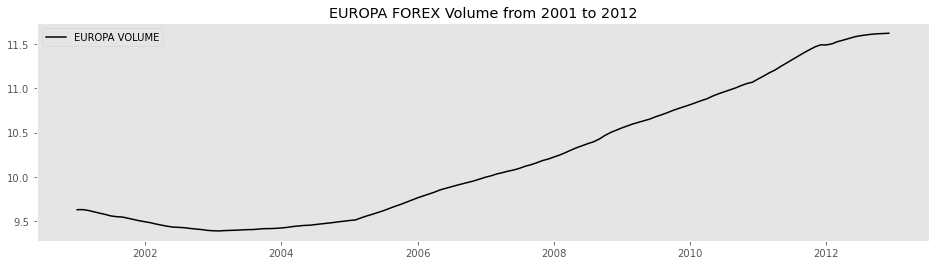

In [64]:
# Nous introduisons un mouvement brownien exponentiel afin de simplifier ce graphyque précédent pas clair
forexoni1 = forexoni
fig, ax = plt.subplots(figsize=(16,4))
plt.plot(forexoni1['DATE'], 
        forexoni1['EUROPA'].ewm(span = 100, adjust=False).mean(), color = 'black', label ='EUROPA VOLUME') # nous supposons que le smooth =100 par an
plt.title('EUROPA FOREX Volume from 2001 to 2012')
plt.legend ()
plt.grid()
plt.show()

### Europa Forex volume series breakdown 

Decomposing the europa volume series is a statistical task that allows us to deconstruct the series into several components,
each representing one of the underlying model categories
We'll be able to see the trend, seasonal and residual components of our data.

In [65]:
# Besoin de statsmodels nous l'importons donc. Il utilise Seasonal decomposition using moving averages.
import statsmodels.api as sm  

In [66]:
#Calcul de la fréquence ou "period"
hour = (24*60)
minu = 15
days = 7
decompfreq = (hour/minu)*days
decompfreq

672.0

### Series seasonal adjustment

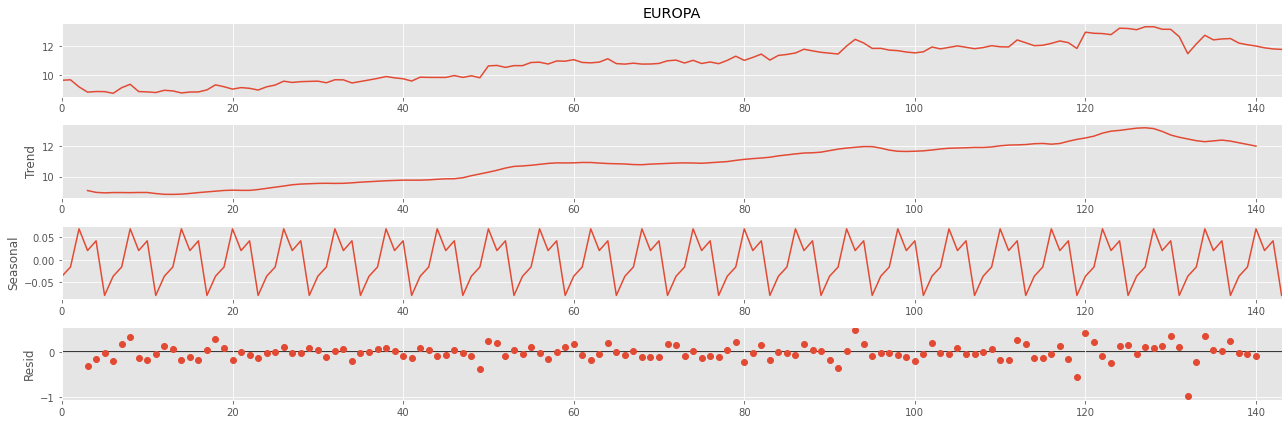

In [67]:
# Observation du Trend, saisonnalité et les résidus
rcParams['figure.figsize'] = 18,6
decomposition = sm.tsa.seasonal_decompose(forexoni1.EUROPA.interpolate(),period=6, model='additive')
fig = decomposition.plot()
plt.show()

In [68]:
import matplotlib.dates as mdates

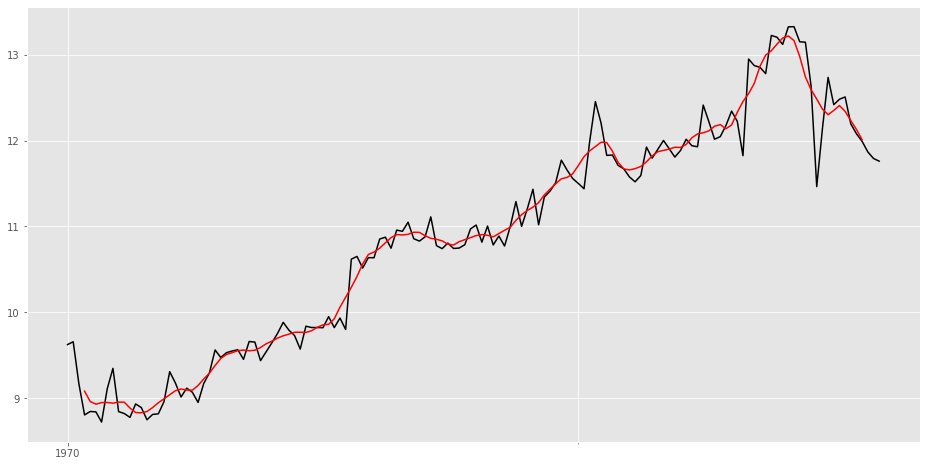

In [69]:
# Ajout du trend au volume
fig, ax = plt.subplots(figsize = (16,8))
ax.grid=(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter ("%Y")
month_format = mdates.DateFormatter ("%m")

ax.xaxis.set_minor_locator(month)

ax.xaxis.grid(True, which= "minor")
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(forexoni1.index, forexoni1['EUROPA'], c='black')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

### Stationarity study 

#### a- Graphs ACF / PACF

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



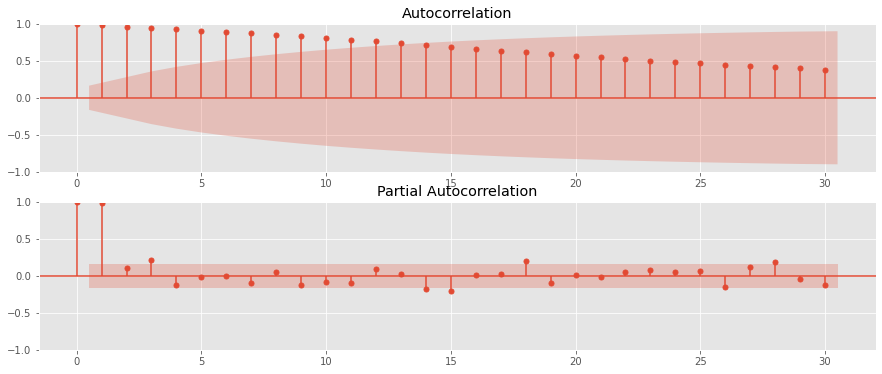

In [70]:
# autocorrelation
pyplot.figure(figsize = (15,6))
pyplot.subplot(211)
plot_acf(forexoni1.EUROPA, ax = pyplot.gca(), lags= 30)
pyplot.subplot(212)
plot_pacf(forexoni1.EUROPA, ax = pyplot.gca(), lags= 30)
pyplot.show()

### c-  Dickey Fuller Test 


#### EUROPE DATA

In [198]:
def dickey_fuller(series,title='forex_Europe'):
    '''Hypothesis Test for stationarity '''
    print(f'Augmented Dickey Fuller Test for the dataset {"FOREX EUROPE VOLUME"}')
    
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','#lags','#observations'] # use help(adfuller) to understand why these labels are chosen
    
    outcome = pd.Series(result[0:4],index=labels)
    
    for key,val in result[4].items():
        outcome[f'critical value ({key})'] = val
        
    print(outcome.to_string()) # this will not print the line 'dtype:float64'
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis') # Ho is Data is not stationary, check help(adfuller)
        print('Reject the null hypothesis')
        print('Data is Stationary')
    else:
        print('Weak evidence against the Null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non stationary')

In [199]:
dickey_fuller(forex_Europe.LnVOLUME,title='EUROPAFOREX VOLUME')

Augmented Dickey Fuller Test for the dataset FOREX EUROPE VOLUME
ADF test statistics      -1.108431
p-value                   0.711698
#lags                     2.000000
#observations           141.000000
critical value (1%)      -3.477601
critical value (5%)      -2.882266
critical value (10%)     -2.577822
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


Interprétation : 
    Test Statistic = -1.108431 > T-lu =-2.882266 (valeur critique à 5%). De plus la p-value (0.709640) >0.05
    Nous ne rejetons pas l'hypothèse nulle : la série est non stationnaire et donc présente une racine unitaire.

In [52]:
dickey_fuller(forex_Europe.ONI,title='ONI')

Augmented Dickey Fuller Test for the dataset FOREX EUROPE VOLUME
ADF test statistics      -2.298336
p-value                   0.172505
#lags                    14.000000
#observations           129.000000
critical value (1%)      -3.482088
critical value (5%)      -2.884219
critical value (10%)     -2.578864
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [53]:
dickey_fuller(forex_Europe['SPREAD'],title="SPREAD")

Augmented Dickey Fuller Test for the dataset FOREX EUROPE VOLUME
ADF test statistics      -2.577578
p-value                   0.097720
#lags                     0.000000
#observations           143.000000
critical value (1%)      -3.476927
critical value (5%)      -2.881973
critical value (10%)     -2.577665
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


So both the EUROPA Lnvolume and the ONI is non stationary. We will take the first order difference of the entire dataframe and re-run the dickey fuller test and store it in a separate dataframe so that the original dataframe is retained.

##### Rendons la série EUROPA VOLUME de forex stationnaire 

In [54]:
# Différenciation de la série Lnvolume
forex_Europe["LnVolume_diff"] = forex_Europe["LnVOLUME"].diff()
forex_Europe["ONI_diff"] = forex_Europe["ONI"].diff()
forex_Europe["SPREAD_diff"] = forex_Europe["SPREAD"].diff()

In [55]:
dickey_fuller(forex_Europe['LnVolume_diff'],title='FOREX EUROPE VOLUME 1st Order Diff')

Augmented Dickey Fuller Test for the dataset FOREX EUROPE VOLUME
ADF test statistics    -1.173480e+01
p-value                 1.315528e-21
#lags                   1.000000e+00
#observations           1.410000e+02
critical value (1%)    -3.477601e+00
critical value (5%)    -2.882266e+00
critical value (10%)   -2.577822e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [56]:
dickey_fuller(forex_Europe['ONI_diff'],title="ONI_diff 1st Order Diff")

Augmented Dickey Fuller Test for the dataset FOREX EUROPE VOLUME
ADF test statistics      -3.911873
p-value                   0.001949
#lags                    13.000000
#observations           129.000000
critical value (1%)      -3.482088
critical value (5%)      -2.884219
critical value (10%)     -2.578864
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [57]:
dickey_fuller(forex_Europe['SPREAD_diff'],title="SPREAD_diff 1st Order Diff")

Augmented Dickey Fuller Test for the dataset FOREX EUROPE VOLUME
ADF test statistics    -1.270632e+01
p-value                 1.053216e-23
#lags                   0.000000e+00
#observations           1.420000e+02
critical value (1%)    -3.477262e+00
critical value (5%)    -2.882118e+00
critical value (10%)   -2.577743e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


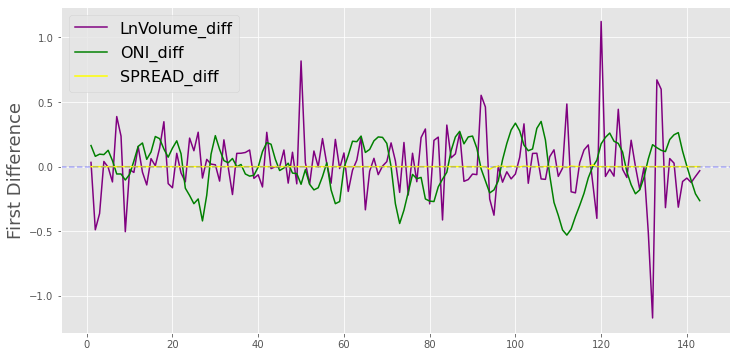

In [58]:
plt.figure(figsize=(12,6))
ice, = plt.plot(forex_Europe['LnVolume_diff'],"purple")
heat, = plt.plot(forex_Europe['ONI_diff'], color='green')
Sp, = plt.plot(forex_Europe['SPREAD_diff'], color='yellow')

plt.axhline(0, linestyle='--', color='b', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['LnVolume_diff', 'ONI_diff','SPREAD_diff'], fontsize=16)

European froex volume, Spread, ONI are stationary after initial differentiation 

#### b- SOUTH AFRICA FOREX Volume stationarity

In [59]:
def dickey_fuller(series,title='South Africa'):
    '''Hypothesis Test for stationarity '''
    print(f'Augmented Dickey Fuller Test for the dataset')
    
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','#lags','#observations'] # use help(adfuller) to understand why these labels are chosen
    
    outcome = pd.Series(result[0:4],index=labels)
    
    for key,val in result[4].items():
        outcome[f'critical value ({key})'] = val
        
    print(outcome.to_string()) # this will not print the line 'dtype:float64'
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis') # Ho is Data is not stationary, check help(adfuller)
        print('Reject the null hypothesis')
        print('Data is Stationary')
    else:
        print('Weak evidence against the Null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non stationary')

In [60]:
dickey_fuller(forex_Safrica.LnVolume,title='SAFRICAFOREX VOLUME')

Augmented Dickey Fuller Test for the dataset
ADF test statistics      -1.288579
p-value                   0.634381
#lags                     9.000000
#observations           134.000000
critical value (1%)      -3.480119
critical value (5%)      -2.883362
critical value (10%)     -2.578407
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [61]:
dickey_fuller(forex_Safrica['Spread'],title="SPREAD")

Augmented Dickey Fuller Test for the dataset
ADF test statistics      -1.955503
p-value                   0.306418
#lags                     8.000000
#observations           135.000000
critical value (1%)      -3.479743
critical value (5%)      -2.883198
critical value (10%)     -2.578320
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [62]:
# Différenciation première de la série Lnvolume
forex_Safrica["LnVolume_diff"] = forex_Safrica["LnVolume"].diff()
forex_Safrica["SPREAD_diff"] =   forex_Safrica["Spread"].diff()

In [63]:
dickey_fuller(forex_Safrica['SPREAD_diff'],title="SPREAD_diff 1st Order Diff")
print('..........')
dickey_fuller(forex_Safrica['LnVolume_diff'],title='FOREX EUROPE VOLUME 1st Order Diff')

Augmented Dickey Fuller Test for the dataset
ADF test statistics    -6.845770e+00
p-value                 1.744473e-09
#lags                   7.000000e+00
#observations           1.350000e+02
critical value (1%)    -3.479743e+00
critical value (5%)    -2.883198e+00
critical value (10%)   -2.578320e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary
..........
Augmented Dickey Fuller Test for the dataset
ADF test statistics      -2.607327
p-value                   0.091492
#lags                     8.000000
#observations           134.000000
critical value (1%)      -3.480119
critical value (5%)      -2.883362
critical value (10%)     -2.578407
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [64]:
# Différenciation seconde de la série Lnvolume
forex_Safrica["LnVolume_diff2"] = forex_Safrica["LnVolume_diff"].diff()
dickey_fuller(forex_Safrica['LnVolume_diff2'],title='FOREX EUROPE VOLUME 1st Order Diff')

Augmented Dickey Fuller Test for the dataset
ADF test statistics      -5.584644
p-value                   0.000001
#lags                     8.000000
#observations           133.000000
critical value (1%)      -3.480500
critical value (5%)      -2.883528
critical value (10%)     -2.578496
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


South african froex volume is stationary after two differentiation while de spread is stationnary after one differenciation 

#### c- Australia FOREX Volume stationarity

In [65]:
# Différenciation première de la série Lnvolume
forex_Australia["LnVolume_diff"] = forex_Australia["LnVolume"].diff()
forex_Australia["SPREAD_diff"] =   forex_Australia["Spread"].diff()

In [66]:
dickey_fuller(forex_Australia['LnVolume_diff'],title='FOREX EUROPE VOLUME 1st Order Diff')
print('..........')
print('..........')
dickey_fuller(forex_Australia['SPREAD_diff'],title="SPREAD_diff 1st Order Diff")



Augmented Dickey Fuller Test for the dataset
ADF test statistics    -6.549092e+00
p-value                 8.944306e-09
#lags                   7.000000e+00
#observations           1.350000e+02
critical value (1%)    -3.479743e+00
critical value (5%)    -2.883198e+00
critical value (10%)   -2.578320e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary
..........
..........
Augmented Dickey Fuller Test for the dataset
ADF test statistics    -7.577622e+00
p-value                 2.734957e-11
#lags                   6.000000e+00
#observations           1.360000e+02
critical value (1%)    -3.479372e+00
critical value (5%)    -2.883037e+00
critical value (10%)   -2.578234e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


Australian froex volume and spread are stationary after initial differentiation 

#### d- CHILE FOREX Volume stationarity

In [67]:
# Différenciation première de la série Lnvolume
forex_Chile["LnVolume_diff"] = forex_Chile["LnVolume"].diff()
forex_Chile["SPREAD_diff"] =   forex_Chile["Spread"].diff()


In [68]:
dickey_fuller(forex_Chile['LnVolume_diff'],title='FOREX CHILE VOLUME 1st Order Diff')
print('..........')
print('..........')
dickey_fuller(forex_Chile['SPREAD_diff'],title="SPREAD_diff 1st Order Diff")


Augmented Dickey Fuller Test for the dataset
ADF test statistics      -3.023014
p-value                   0.032800
#lags                    10.000000
#observations           132.000000
critical value (1%)      -3.480888
critical value (5%)      -2.883697
critical value (10%)     -2.578586
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary
..........
..........
Augmented Dickey Fuller Test for the dataset
ADF test statistics    -9.041792e+00
p-value                 5.110082e-15
#lags                   4.000000e+00
#observations           1.380000e+02
critical value (1%)    -3.478648e+00
critical value (5%)    -2.882722e+00
critical value (10%)   -2.578065e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


Chilean froex volume is stationary after initial differentiations

In [254]:
###  - Données AUSTRALIA
austra = pd.read_excel(path+"dataextractreg_.xlsx",sheet_name="Australia_set")
###  - Données chile
chil = pd.read_excel(path+"dataextractreg_.xlsx",sheet_name="Chile_set")
###  - Données South africa
safri = pd.read_excel(path+"dataextractreg_.xlsx",sheet_name="Safrica_set")
###  - Données Europa
euro = pd.read_excel(path+"dataextractreg_.xlsx",sheet_name="Europa_set")

## Partie 6 : Etudes Econométriques

In [194]:
# Report differenciation values 
forex_Europe["Vol_FEurope"]        = forex_Europe["LnVOLUME"].diff()
forex_Safrica ["Vol_FSAfrica"]     = forex_Safrica["LnVolume"].diff(2)
forex_Chile["Vol_FChile"]          = forex_Chile ["LnVolume"].diff()
forex_Australia ["Vol_FAustralia"] = forex_Australia ["LnVolume"].diff()

In [195]:
#Delating na
forex_Europe.dropna()
forex_Safrica.dropna()
forex_Chile.dropna()
forex_Australia.dropna()


,DATE,ASK,BID,Spread,Volume,LnVolume,volatilityau,Year,SEASON,ONI,Phase,dSST3.4,Vol_FAustralia
1,2001-02-01,0.64640,0.64624,0.00016,4736.000000,8.462948,0.002154,2001,jfm,-0.516667,Cool Phase/La Nina,-0.53,-0.046414
2,2001-03-01,0.64640,0.64624,0.00016,4130.000000,8.326033,0.018746,2001,fma,-0.436667,Neutral Phase,-0.39,-0.136915
3,2001-04-01,0.64640,0.64624,0.00016,5650.000000,8.639411,0.098206,2001,mam,-0.340000,Neutral Phase,-0.39,0.313378
4,2001-05-01,0.64640,0.64624,0.00016,6393.000000,8.762959,0.015264,2001,amj,-0.246667,Neutral Phase,-0.24,0.123548
5,2001-06-01,0.64640,0.64624,0.00016,3298.000000,8.101072,0.438095,2001,mjj,-0.120000,Neutral Phase,-0.11,-0.661887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2012-08-01,1.04689,1.04675,0.00014,334602.967742,12.720700,0.007493,2012,jas,0.366667,Neutral Phase,0.47,0.086562
140,2012-09-01,1.03288,1.03222,0.00066,279111.633333,12.539367,0.032882,2012,aso,0.370000,Neutral Phase,0.38,-0.181333
141,2012-10-01,1.03609,1.03594,0.00015,343852.967742,12.747969,0.043515,2012,son,0.263333,Neutral Phase,0.26,0.208602
142,2012-11-01,1.04138,1.04124,0.00014,455343.200000,13.028807,0.078870,2012,ond,0.053333,Neutral Phase,0.15,0.280837


## CREATION DES DUMMIES

In [71]:
#### EUROPA  CREATION DES DUMMIES de Year

forex_Europe["year2001"]  =np.where((forex_Europe["Year"] ==2001),"1","0")
forex_Europe["year2002"]  =np.where((forex_Europe["Year"] ==2002),"1","0")
forex_Europe["year2003"]  =np.where((forex_Europe["Year"] ==2003),"1","0")
forex_Europe["year2004"]  =np.where((forex_Europe["Year"] ==2004),"1","0")
forex_Europe["year2005"]  =np.where((forex_Europe["Year"] ==2005),"1","0")
forex_Europe["year2006"]  =np.where((forex_Europe["Year"] ==2006),"1","0")
forex_Europe["year2007"]  =np.where((forex_Europe["Year"] ==2007),"1","0")
forex_Europe["year2008"]  =np.where((forex_Europe["Year"] ==2008),"1","0")
forex_Europe["year2009"]  =np.where((forex_Europe["Year"] ==2009),"1","0")
forex_Europe["year2010"]  =np.where((forex_Europe["Year"] ==2010),"1","0")
forex_Europe["year2011"]  =np.where((forex_Europe["Year"] ==2011),"1","0")
forex_Europe["year2012"]  =np.where((forex_Europe["Year"] ==2012),"1","0")

# CREATION DES DUMMIES du monthname
forex_Europe["JANUARY"]   =np.where((forex_Europe["Monthname"] =="January"),"1","0")
forex_Europe["FEBRUARY"]  =np.where((forex_Europe["Monthname"] =="February"),"1","0")
forex_Europe["MARCH"]     =np.where((forex_Europe["Monthname"] =="March"),"1","0")
forex_Europe["APRIL"]     =np.where((forex_Europe["Monthname"] =="April"),"1","0")
forex_Europe["MAY"]       =np.where((forex_Europe["Monthname"] =="May"),"1","0")
forex_Europe["JUNE"]      =np.where((forex_Europe["Monthname"] =="June"),"1","0")
forex_Europe["JULY"]      =np.where((forex_Europe["Monthname"] =="July"),"1","0")
forex_Europe["AUGUST"]    =np.where((forex_Europe["Monthname"] =="August"),"1","0")
forex_Europe["SEPTEMBER"] =np.where((forex_Europe["Monthname"] =="September"),"1","0")
forex_Europe["OCTOBER"]   =np.where((forex_Europe["Monthname"] =="October"),"1","0")
forex_Europe["NOVEMBER"]  =np.where((forex_Europe["Monthname"] =="November"),"1","0")
forex_Europe["DECEMBER"]  =np.where((forex_Europe["Monthname"] =="December"),"1","0")


In [72]:
#### SOUTH AFRICA  CREATION DES DUMMIES de Year

forex_Safrica["year2001"]  =np.where((forex_Safrica["Year"] ==2001),"1","0")
forex_Safrica["year2002"]  =np.where((forex_Safrica["Year"] ==2002),"1","0")
forex_Safrica["year2003"]  =np.where((forex_Safrica["Year"] ==2003),"1","0")
forex_Safrica["year2004"]  =np.where((forex_Safrica["Year"] ==2004),"1","0")
forex_Safrica["year2005"]  =np.where((forex_Safrica["Year"] ==2005),"1","0")
forex_Safrica["year2006"]  =np.where((forex_Safrica["Year"] ==2006),"1","0")
forex_Safrica["year2007"]  =np.where((forex_Safrica["Year"] ==2007),"1","0")
forex_Safrica["year2008"]  =np.where((forex_Safrica["Year"] ==2008),"1","0")
forex_Safrica["year2009"]  =np.where((forex_Safrica["Year"] ==2009),"1","0")
forex_Safrica["year2010"]  =np.where((forex_Safrica["Year"] ==2010),"1","0")
forex_Safrica["year2011"]  =np.where((forex_Safrica["Year"] ==2011),"1","0")
forex_Safrica["year2012"]  =np.where((forex_Safrica["Year"] ==2012),"1","0")

# CREATION DES DUMMIES du monthname
forex_Safrica["JANUARY"]   =np.where((forex_Safrica["Monthname"] =="January"),"1","0")
forex_Safrica["FEBRUARY"]  =np.where((forex_Safrica["Monthname"] =="February"),"1","0")
forex_Safrica["MARCH"]     =np.where((forex_Safrica["Monthname"] =="March"),"1","0")
forex_Safrica["APRIL"]     =np.where((forex_Safrica["Monthname"] =="April"),"1","0")
forex_Safrica["MAY"]       =np.where((forex_Safrica["Monthname"] =="May"),"1","0")
forex_Safrica["JUNE"]      =np.where((forex_Safrica["Monthname"] =="June"),"1","0")
forex_Safrica["JULY"]      =np.where((forex_Safrica["Monthname"] =="July"),"1","0")
forex_Safrica["AUGUST"]    =np.where((forex_Safrica["Monthname"] =="August"),"1","0")
forex_Safrica["SEPTEMBER"] =np.where((forex_Safrica["Monthname"] =="September"),"1","0")
forex_Safrica["OCTOBER"]   =np.where((forex_Safrica["Monthname"] =="October"),"1","0")
forex_Safrica["NOVEMBER"]  =np.where((forex_Safrica["Monthname"] =="November"),"1","0")
forex_Safrica["DECEMBER"]  =np.where((forex_Safrica["Monthname"] =="December"),"1","0")

In [73]:
#### CHILE  CREATION DES DUMMIES de Year

forex_Chile["year2001"]  =np.where((forex_Chile["Year"] ==2001),"1","0")
forex_Chile["year2002"]  =np.where((forex_Chile["Year"] ==2002),"1","0")
forex_Chile["year2003"]  =np.where((forex_Chile["Year"] ==2003),"1","0")
forex_Chile["year2004"]  =np.where((forex_Chile["Year"] ==2004),"1","0")
forex_Chile["year2005"]  =np.where((forex_Chile["Year"] ==2005),"1","0")
forex_Chile["year2006"]  =np.where((forex_Chile["Year"] ==2006),"1","0")
forex_Chile["year2007"]  =np.where((forex_Chile["Year"] ==2007),"1","0")
forex_Chile["year2008"]  =np.where((forex_Chile["Year"] ==2008),"1","0")
forex_Chile["year2009"]  =np.where((forex_Chile["Year"] ==2009),"1","0")
forex_Chile["year2010"]  =np.where((forex_Chile["Year"] ==2010),"1","0")
forex_Chile["year2011"]  =np.where((forex_Chile["Year"] ==2011),"1","0")
forex_Chile["year2012"]  =np.where((forex_Chile["Year"] ==2012),"1","0")

# CREATION DES DUMMIES du monthname
forex_Chile["JANUARY"]   =np.where((forex_Chile["Monthname"] =="January"),"1","0")
forex_Chile["FEBRUARY"]  =np.where((forex_Chile["Monthname"] =="February"),"1","0")
forex_Chile["MARCH"]     =np.where((forex_Chile["Monthname"] =="March"),"1","0")
forex_Chile["APRIL"]     =np.where((forex_Chile["Monthname"] =="April"),"1","0")
forex_Chile["MAY"]       =np.where((forex_Chile["Monthname"] =="May"),"1","0")
forex_Chile["JUNE"]      =np.where((forex_Chile["Monthname"] =="June"),"1","0")
forex_Chile["JULY"]      =np.where((forex_Chile["Monthname"] =="July"),"1","0")
forex_Chile["AUGUST"]    =np.where((forex_Chile["Monthname"] =="August"),"1","0")
forex_Chile["SEPTEMBER"] =np.where((forex_Chile["Monthname"] =="September"),"1","0")
forex_Chile["OCTOBER"]   =np.where((forex_Chile["Monthname"] =="October"),"1","0")
forex_Chile["NOVEMBER"]  =np.where((forex_Chile["Monthname"] =="November"),"1","0")
forex_Chile["DECEMBER"]  =np.where((forex_Chile["Monthname"] =="December"),"1","0")

In [74]:
#### AUSTRALIA  CREATION DES DUMMIES de Year

forex_Australia["year2001"]  =np.where((forex_Australia["Year"] ==2001),"1","0")
forex_Australia["year2002"]  =np.where((forex_Australia["Year"] ==2002),"1","0")
forex_Australia["year2003"]  =np.where((forex_Australia["Year"] ==2003),"1","0")
forex_Australia["year2004"]  =np.where((forex_Australia["Year"] ==2004),"1","0")
forex_Australia["year2005"]  =np.where((forex_Australia["Year"] ==2005),"1","0")
forex_Australia["year2006"]  =np.where((forex_Australia["Year"] ==2006),"1","0")
forex_Australia["year2007"]  =np.where((forex_Australia["Year"] ==2007),"1","0")
forex_Australia["year2008"]  =np.where((forex_Australia["Year"] ==2008),"1","0")
forex_Australia["year2009"]  =np.where((forex_Australia["Year"] ==2009),"1","0")
forex_Australia["year2010"]  =np.where((forex_Australia["Year"] ==2010),"1","0")
forex_Australia["year2011"]  =np.where((forex_Australia["Year"] ==2011),"1","0")
forex_Australia["year2012"]  =np.where((forex_Australia["Year"] ==2012),"1","0")

# CREATION DES DUMMIES du monthname
forex_Australia["JANUARY"]   =np.where((forex_Australia["Monthname"] =="January"),"1","0")
forex_Australia["FEBRUARY"]  =np.where((forex_Australia["Monthname"] =="February"),"1","0")
forex_Australia["MARCH"]     =np.where((forex_Australia["Monthname"] =="March"),"1","0")
forex_Australia["APRIL"]     =np.where((forex_Australia["Monthname"] =="April"),"1","0")
forex_Australia["MAY"]       =np.where((forex_Australia["Monthname"] =="May"),"1","0")
forex_Australia["JUNE"]      =np.where((forex_Australia["Monthname"] =="June"),"1","0")
forex_Australia["JULY"]      =np.where((forex_Australia["Monthname"] =="July"),"1","0")
forex_Australia["AUGUST"]    =np.where((forex_Australia["Monthname"] =="August"),"1","0")
forex_Australia["SEPTEMBER"] =np.where((forex_Australia["Monthname"] =="September"),"1","0")
forex_Australia["OCTOBER"]   =np.where((forex_Australia["Monthname"] =="October"),"1","0")
forex_Australia["NOVEMBER"]  =np.where((forex_Australia["Monthname"] =="November"),"1","0")
forex_Australia["DECEMBER"]  =np.where((forex_Australia["Monthname"] =="December"),"1","0")

## OLS MODELS at 0.5 Phases  level 

In [75]:
## PHASES AT 0.5
# EUROPE
forex_Europe05=forex_Europe
forex_Europe05["CoolPhaseLaNina"]=np.where(forex_Europe05["ONI"]<-0.5,1,0)
forex_Europe05["WarmPhaseElNino"]=np.where(forex_Europe05["ONI"]> 0.5,1,0)
forex_Europe05["Neutralphase"]=np.where((forex_Europe05["ONI"]>-0.5) & (forex_Europe05["ONI"]<0.5),1,0)
# SOUTH AFRICA
forex_Safrica05=forex_Safrica
forex_Safrica05["CoolPhaseLaNina"]=np.where(forex_Safrica05["ONI"]<-0.5,1,0)
forex_Safrica05["WarmPhaseElNino"]=np.where(forex_Safrica05["ONI"]> 0.5,1,0)
forex_Safrica05["Neutralphase"]=np.where((forex_Safrica05["ONI"]>-0.5) & (forex_Safrica05["ONI"]<0.5),1,0)
# AUSTRALIA
forex_Australia05=forex_Australia
forex_Australia05["CoolPhaseLaNina"]=np.where(forex_Australia05["ONI"]<-0.5,1,0)
forex_Australia05["WarmPhaseElNino"]=np.where(forex_Australia05["ONI"]> 0.5,1,0)
forex_Australia05["Neutralphase"]=np.where((forex_Australia05["ONI"]>-0.5) & (forex_Australia05["ONI"]<0.5),1,0)
# CHILIE
forex_Chile05=forex_Chile
forex_Chile05["CoolPhaseLaNina"]=np.where(forex_Chile05["ONI"]<-0.5,1,0)
forex_Chile05["WarmPhaseElNino"]=np.where(forex_Chile05["ONI"]> 0.5,1,0)
forex_Chile05["Neutralphase"]=np.where((forex_Chile05["ONI"]>-0.5) & (forex_Chile05["ONI"]<0.5),1,0)

In [76]:
import statsmodels.formula.api as smf

In [77]:
############### EUROPE
# Instonction de l'objet régression
reg= smf.ols("Vol_FEurope ~ CoolPhaseLaNina + WarmPhaseElNino +SPREAD_diff +JANUARY + MARCH + APRIL + MAY + JUNE + JULY + AUGUST + SEPTEMBER + OCTOBER + NOVEMBER + DECEMBER + year2001 + year2002 + year2003 + year2004 + year2006 + year2007 + year2008 + year2009 + year2010 + year2011 + year2012" ,data = forex_Europe05)
# estimation des paramètres 
res = reg.fit()
# afficher les résultats 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Vol_FEurope   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                 -0.063
Method:                 Least Squares   F-statistic:                    0.6626
Date:                Wed, 16 Aug 2023   Prob (F-statistic):              0.883
Time:                        03:35:34   Log-Likelihood:                 2.7636
No. Observations:                 143   AIC:                             46.47
Df Residuals:                     117   BIC:                             123.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1210      0.110     

In [78]:
############### SOUTH AFRICA
# Instonction de l'objet régression
reg= smf.ols("Vol_FSAfrica ~ CoolPhaseLaNina + WarmPhaseElNino +SPREAD_diff+JANUARY + MARCH + APRIL + MAY + JUNE + JULY + AUGUST + SEPTEMBER + OCTOBER + NOVEMBER + DECEMBER + year2001 + year2002 + year2003 + year2004 + year2006 + year2007 + year2008 + year2009 + year2010 + year2011 + year2012" ,data = forex_Safrica05)
# estimation des paramètres 
res = reg.fit()
# afficher les résultats 
all = print(res.summary())
all

                            OLS Regression Results                            
Dep. Variable:           Vol_FSAfrica   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     4.666
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           5.75e-09
Time:                        03:35:34   Log-Likelihood:                 299.01
No. Observations:                 142   AIC:                            -546.0
Df Residuals:                     116   BIC:                            -469.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0527      0.014     

In [79]:
############### AUSTRALIA
# Instonction de l'objet régression
reg= smf.ols("Vol_FAustralia ~ CoolPhaseLaNina + WarmPhaseElNino + SPREAD_diff +JANUARY + MARCH + APRIL + MAY + JUNE + JULY + AUGUST + SEPTEMBER + OCTOBER + NOVEMBER + DECEMBER + year2001 + year2002 + year2003 + year2004 + year2006 + year2007 + year2008 + year2009 + year2010 + year2011 + year2012" ,data = forex_Australia05)
# estimation des paramètres 
res = reg.fit()
# afficher les résultats 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Vol_FAustralia   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                 -0.107
Method:                 Least Squares   F-statistic:                    0.4493
Date:                Wed, 16 Aug 2023   Prob (F-statistic):              0.988
Time:                        03:35:34   Log-Likelihood:                -94.576
No. Observations:                 143   AIC:                             241.2
Df Residuals:                     117   BIC:                             318.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0899      0.218     

In [80]:
############### CHILE
# Instonction de l'objet régression
reg= smf.ols("Vol_FChile ~ CoolPhaseLaNina + WarmPhaseElNino+SPREAD_diff +JANUARY + MARCH + APRIL + MAY + JUNE + JULY + AUGUST + SEPTEMBER + OCTOBER + NOVEMBER + DECEMBER + year2001 + year2002 + year2003 + year2004 + year2006 + year2007 + year2008 + year2009 + year2010 + year2011 + year2012" ,data = forex_Chile05)
# estimation des paramètres 
res = reg.fit()
# afficher les résultats 
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             Vol_FChile   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     8.336
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           3.34e-16
Time:                        03:35:34   Log-Likelihood:                 720.56
No. Observations:                 143   AIC:                            -1389.
Df Residuals:                     117   BIC:                            -1312.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0010      0.001     

## OLS MODELS at level 1 for ONI Phases

In [81]:
## PHASES AT 1
# EUROPE
forex_Europe1=forex_Europe
forex_Europe1["CoolPhaseLaNina"]=np.where(forex_Europe1["ONI"]<-1,1,0)
forex_Europe1["WarmPhaseElNino"]=np.where(forex_Europe1["ONI"]> 1,1,0)
forex_Europe1["Neutralphase"]=np.where((forex_Europe1["ONI"]>-1) & (forex_Europe1["ONI"]<1),1,0)
# SOUTH AFRICA
forex_Safrica1=forex_Safrica
forex_Safrica1["CoolPhaseLaNina"]=np.where(forex_Safrica1["ONI"]<-1,1,0)
forex_Safrica1["WarmPhaseElNino"]=np.where(forex_Safrica["ONI"]> 1,1,0)
forex_Safrica1["Neutralphase"]=np.where((forex_Safrica1["ONI"]>-1) & (forex_Safrica1["ONI"]<1),1,0)
# AUSTRALIA
forex_Australia1=forex_Australia
forex_Australia1["CoolPhaseLaNina"]=np.where(forex_Australia1["ONI"]<-1,1,0)
forex_Australia1["WarmPhaseElNino"]=np.where(forex_Australia1["ONI"]> 1,1,0)
forex_Australia1["Neutralphase"]=np.where((forex_Australia1["ONI"]>-1) & (forex_Australia1["ONI"]<1),1,0)
# CHILIE
forex_Chile1=forex_Chile
forex_Chile1["CoolPhaseLaNina"]=np.where(forex_Chile1["ONI"]<-1,1,0)
forex_Chile1["WarmPhaseElNino"]=np.where(forex_Chile1["ONI"]> 1,1,0)
forex_Chile1["Neutralphase"]=np.where((forex_Chile1["ONI"]>-1) & (forex_Chile1["ONI"]<1),1,0)

In [82]:
############### EUROPE
# Instonction de l'objet régression
reg= smf.ols("Vol_FEurope ~ CoolPhaseLaNina + WarmPhaseElNino +SPREAD_diff+ JANUARY + MARCH + APRIL + MAY + JUNE + JULY + AUGUST + SEPTEMBER + OCTOBER + NOVEMBER + DECEMBER + year2001 + year2002 + year2003 + year2004 + year2006 + year2007 + year2008 + year2009 + year2010 + year2011 + year2012" ,data = forex_Europe1)
# estimation des paramètres 
res = reg.fit()
# afficher les résultats 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Vol_FEurope   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                    0.6490
Date:                Wed, 16 Aug 2023   Prob (F-statistic):              0.894
Time:                        03:35:35   Log-Likelihood:                 2.5805
No. Observations:                 143   AIC:                             46.84
Df Residuals:                     117   BIC:                             123.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1085      0.105     

In [83]:
############### SOUTH AFRICA
# Instonction de l'objet régression
reg= smf.ols("Vol_FSAfrica ~ CoolPhaseLaNina + WarmPhaseElNino +SPREAD_diff+JANUARY + MARCH + APRIL + MAY + JUNE + JULY + AUGUST + SEPTEMBER + OCTOBER + NOVEMBER + DECEMBER + year2001 + year2002 + year2003 + year2004 + year2006 + year2007 + year2008 + year2009 + year2010 + year2011 + year2012" ,data = forex_Safrica1)
# estimation des paramètres 
res = reg.fit()
# afficher les résultats 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Vol_FSAfrica   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     4.521
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        03:35:35   Log-Likelihood:                 297.89
No. Observations:                 142   AIC:                            -543.8
Df Residuals:                     116   BIC:                            -466.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0582      0.013     

In [84]:
###############  AUSTRALIA
# Instonction de l'objet régression
reg= smf.ols("Vol_FAustralia ~ CoolPhaseLaNina + WarmPhaseElNino +SPREAD_diff+JANUARY + MARCH + APRIL + MAY + JUNE + JULY + AUGUST + SEPTEMBER + OCTOBER + NOVEMBER + DECEMBER + year2001 + year2002 + year2003 + year2004 + year2006 + year2007 + year2008 + year2009 + year2010 + year2011 + year2012" ,data = forex_Australia1)
# estimation des paramètres 
res = reg.fit()
# afficher les résultats 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Vol_FAustralia   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                 -0.102
Method:                 Least Squares   F-statistic:                    0.4746
Date:                Wed, 16 Aug 2023   Prob (F-statistic):              0.983
Time:                        03:35:35   Log-Likelihood:                -94.223
No. Observations:                 143   AIC:                             240.4
Df Residuals:                     117   BIC:                             317.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0733      0.207     

In [85]:
############### CHILE
# Instonction de l'objet régression
reg= smf.ols("Vol_FChile ~ CoolPhaseLaNina + WarmPhaseElNino +SPREAD_diff+JANUARY + MARCH + APRIL + MAY + JUNE + JULY + AUGUST + SEPTEMBER + OCTOBER + NOVEMBER + DECEMBER + year2001 + year2002 + year2003 + year2004 + year2006 + year2007 + year2008 + year2009 + year2010 + year2011 + year2012" ,data = forex_Chile1)
# estimation des paramètres 
res = reg.fit()
# afficher les résultats 
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             Vol_FChile   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     6.468
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           9.54e-13
Time:                        03:35:35   Log-Likelihood:                 709.49
No. Observations:                 143   AIC:                            -1367.
Df Residuals:                     117   BIC:                            -1290.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0019      0.001     

## OLS MODELS at 1.5 Phases  level 

In [86]:
## PHASES AT 1.5
# EUROPE
forex_Europe15=forex_Europe
forex_Europe15["CoolPhaseLaNina"]=np.where(forex_Europe15["ONI"]<-1.5,1,0)
forex_Europe15["WarmPhaseElNino"]=np.where(forex_Europe15["ONI"]> 1.5,1,0)
forex_Europe15["Neutralphase"]=np.where((forex_Europe15["ONI"]>-1.5) & (forex_Europe15["ONI"]<1.5),1,0)
# SOUTH AFRICA
forex_Safrica15=forex_Safrica
forex_Safrica15["CoolPhaseLaNina"]=np.where(forex_Safrica15["ONI"]<-1.5,1,0)
forex_Safrica15["WarmPhaseElNino"]=np.where(forex_Safrica15["ONI"]> 1.5,1,0)
forex_Safrica15["Neutralphase"]=np.where((forex_Safrica15["ONI"]>-1.5) & (forex_Safrica15["ONI"]<1.5),1,0)
# AUSTRALIA
forex_Australia15=forex_Australia
forex_Australia15["CoolPhaseLaNina"]=np.where(forex_Australia15["ONI"]<-1.5,1,0)
forex_Australia15["WarmPhaseElNino"]=np.where(forex_Australia15["ONI"]> 1.5,1,0)
forex_Australia15["Neutralphase"]=np.where((forex_Australia15["ONI"]>-1.5) & (forex_Australia15["ONI"]<1.5),1,0)
# CHILIE
forex_Chile15=forex_Chile
forex_Chile15["CoolPhaseLaNina"]=np.where(forex_Chile15["ONI"]<-1.5,1,0)
forex_Chile15["WarmPhaseElNino"]=np.where(forex_Chile15["ONI"]> 1.5,1,0)
forex_Chile15["Neutralphase"]=np.where((forex_Chile15["ONI"]>-1.5) & (forex_Chile15["ONI"]<1.5),1,0)

In [87]:
############### EUROPE
# Instonction de l'objet régression
reg= smf.ols("Vol_FEurope ~ CoolPhaseLaNina + WarmPhaseElNino +SPREAD_diff+ JANUARY + MARCH + APRIL + MAY + JUNE + JULY + AUGUST + SEPTEMBER + OCTOBER + NOVEMBER + DECEMBER + year2001 + year2002 + year2003 + year2004 + year2006 + year2007 + year2008 + year2009 + year2010 + year2011 + year2012" ,data = forex_Europe15)
# estimation des paramètres 
res = reg.fit()
# afficher les résultats 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Vol_FEurope   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                    0.6533
Date:                Wed, 16 Aug 2023   Prob (F-statistic):              0.891
Time:                        03:35:36   Log-Likelihood:                 2.6387
No. Observations:                 143   AIC:                             46.72
Df Residuals:                     117   BIC:                             123.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1110      0.105     

In [88]:
############### SOUTH AFRICA
# Instonction de l'objet régression
reg= smf.ols("Vol_FSAfrica ~ CoolPhaseLaNina +SPREAD_diff+ WarmPhaseElNino +JANUARY + MARCH + APRIL + MAY + JUNE + JULY + AUGUST + SEPTEMBER + OCTOBER + NOVEMBER + DECEMBER + year2001 + year2002 + year2003 + year2004 + year2006 + year2007 + year2008 + year2009 + year2010 + year2011 + year2012" ,data = forex_Safrica15)
# estimation des paramètres 
res = reg.fit()
# afficher les résultats 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Vol_FSAfrica   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     4.539
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.10e-08
Time:                        03:35:36   Log-Likelihood:                 298.03
No. Observations:                 142   AIC:                            -544.1
Df Residuals:                     116   BIC:                            -467.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0580      0.013     

In [89]:
###############  AUSTRALIA
# Instonction de l'objet régression
reg= smf.ols("Vol_FAustralia ~ CoolPhaseLaNina + WarmPhaseElNino +SPREAD_diff+JANUARY + MARCH + APRIL + MAY + JUNE + JULY + AUGUST + SEPTEMBER + OCTOBER + NOVEMBER + DECEMBER + year2001 + year2002 + year2003 + year2004 + year2006 + year2007 + year2008 + year2009 + year2010 + year2011 + year2012" ,data = forex_Australia15)
# estimation des paramètres 
res = reg.fit()
# afficher les résultats 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Vol_FAustralia   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                 -0.069
Method:                 Least Squares   F-statistic:                    0.6354
Date:                Wed, 16 Aug 2023   Prob (F-statistic):              0.905
Time:                        03:35:36   Log-Likelihood:                -92.027
No. Observations:                 143   AIC:                             236.1
Df Residuals:                     117   BIC:                             313.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0763      0.204     

In [90]:
############### CHILE
# Instonction de l'objet régression
reg= smf.ols("Vol_FChile ~ CoolPhaseLaNina + WarmPhaseElNino +SPREAD_diff+JANUARY + MARCH + APRIL + MAY + JUNE + JULY + AUGUST + SEPTEMBER + OCTOBER + NOVEMBER + DECEMBER + year2001 + year2002 + year2003 + year2004 + year2006 + year2007 + year2008 + year2009 + year2010 + year2011 + year2012" ,data = forex_Chile15)
# estimation des paramètres 
res = reg.fit()
# afficher les résultats 
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             Vol_FChile   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     6.243
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           2.67e-12
Time:                        03:35:37   Log-Likelihood:                 708.03
No. Observations:                 143   AIC:                            -1364.
Df Residuals:                     117   BIC:                            -1287.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0018      0.001     

### COINTEGRATION TEST 

####  cointégration analyses

###### europe

In [91]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
# rank selection of CoolPhaseLaNina
eu_c_ranktest = select_coint_rank (forex_Europe[["LnVOLUME","CoolPhaseLaNina"]], det_order =0, k_ar_diff=3, method="trace",signif =0.05)
#  displaying selection rank
print('-- rank selection  CoolPhaseLaNina--')
print(eu_c_ranktest)
print(eu_c_ranktest.rank)

# rank selection of CoolPhaseLaNina
eu_w_ranktest = select_coint_rank (forex_Europe[["LnVOLUME","WarmPhaseElNino"]], det_order =0, k_ar_diff=3, method="trace",signif =0.05)
#  displaying selection rank
print('-- rank selection WarmPhaseElNino--')
print(eu_w_ranktest)
print(eu_w_ranktest.rank)

-- rank selection  CoolPhaseLaNina--
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          32.71          15.49
  1   2          1.741          3.841
-------------------------------------
1
-- rank selection WarmPhaseElNino--
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          34.74          15.49
  1   2          1.782          3.841
-------------------------------------
1


In [92]:
###### South africa 
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
# rank selection of CoolPhaseLaNina
SA_c_ranktest = select_coint_rank (forex_Safrica[["LnVolume","CoolPhaseLaNina"]], det_order =0, k_ar_diff=3, method="trace",signif =0.05)
#  displaying selection rank
print('-- rank selection  CoolPhaseLaNina--')
print(SA_c_ranktest)
print(SA_c_ranktest.rank)

# rank selection of CoolPhaseLaNina
SA_w_ranktest = select_coint_rank (forex_Safrica[["LnVolume","WarmPhaseElNino"]], det_order =1, k_ar_diff=3, method="trace",signif =0.05)
#  displaying selection rank
print('-- rank selection WarmPhaseElNino--')
print(SA_w_ranktest)
print(SA_w_ranktest.rank)

-- rank selection  CoolPhaseLaNina--
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          28.36          15.49
  1   2          1.049          3.841
-------------------------------------
1
-- rank selection WarmPhaseElNino--
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          33.77          18.40
  1   2          1.266          3.841
-------------------------------------
1


##### Australia

In [93]:
###### South africa 
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
# rank selection of CoolPhaseLaNina
A_c_ranktest = select_coint_rank (forex_Australia[["LnVolume","CoolPhaseLaNina"]], det_order =0, k_ar_diff=3, method="trace",signif =0.05)
#  displaying selection rank
print('-- rank selection  CoolPhaseLaNina--')
print(A_c_ranktest)
print(A_c_ranktest.rank)

# rank selection of CoolPhaseLaNina
A_w_ranktest = select_coint_rank (forex_Australia[["LnVolume","WarmPhaseElNino"]], det_order =0, k_ar_diff=3, method="trace",signif =0.05)
#  displaying selection rank
print('-- rank selection WarmPhaseElNino--')
print(A_w_ranktest)
print(A_w_ranktest.rank)

-- rank selection  CoolPhaseLaNina--
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          31.27          15.49
  1   2          3.350          3.841
-------------------------------------
1
-- rank selection WarmPhaseElNino--
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          36.34          15.49
  1   2          3.137          3.841
-------------------------------------
1


##### Chilie

In [94]:
###### South africa 
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
# rank selection of CoolPhaseLaNina
C_c_ranktest = select_coint_rank (forex_Chile[["LnVolume","CoolPhaseLaNina"]], det_order =0, k_ar_diff=3, method="trace",signif =0.05)
#  displaying selection rank
print('-- rank selection  CoolPhaseLaNina--')
print(C_c_ranktest)
print(C_c_ranktest.rank)

# rank selection of CoolPhaseLaNina
C_w_ranktest = select_coint_rank (forex_Chile[["LnVolume","WarmPhaseElNino"]], det_order =0, k_ar_diff=3, method="trace",signif =0.05)
#  displaying selection rank
print('-- rank selection WarmPhaseElNino--')
print(C_w_ranktest)
print(C_w_ranktest.rank)

-- rank selection  CoolPhaseLaNina--
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          26.45          15.49
  1   2        0.02243          3.841
-------------------------------------
1
-- rank selection WarmPhaseElNino--
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          35.73          15.49
  1   2        0.02107          3.841
-------------------------------------
1


### MODELE VAR  --> Short-run model 

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



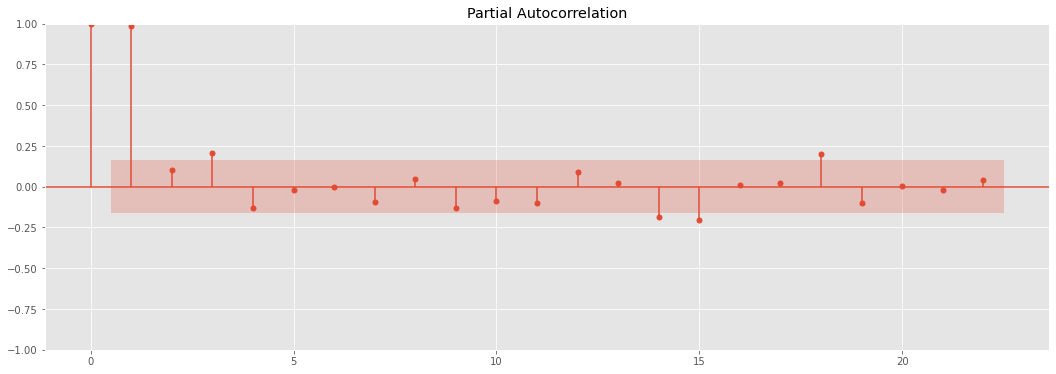

In [95]:
plot_pacf(forex_Europe05['LnVOLUME'])
plt.show()

In [96]:
#correlation between ONI and volume
from scipy.stats import pearsonr
for lag in range (1,5):
    oni_series = forex_Europe1["LnVOLUME"].iloc[lag:]
    lagged_volume_series = forex_Europe["ONI"].iloc[:-lag]
    print('Lag:%s'%lag)
    print(pearsonr(oni_series,lagged_volume_series))
    print('............')
    

Lag:1
(-0.4123807194467677, 3.0930649133169555e-07)
............
Lag:2
(-0.4060586592437532, 5.339258969573248e-07)
............
Lag:3
(-0.4090537173430432, 4.750525498152929e-07)
............
Lag:4
(-0.4193330449317818, 2.5115547465300827e-07)
............


### VAR Model Order Selection

In [97]:
from statsmodels.tsa.api import VAR
# VAR model 
forex_Europe_var = forex_Europe[["LnVOLUME","SPREAD", "CoolPhaseLaNina" ,"WarmPhaseElNino"]]
# LAG Selection
p = [1,2,3,4,5,6,7]  # try with list of 7 p values

for i in  p:
    model_europe = VAR(forex_Europe_var)
    results = model_europe.fit(i)
    print(f'VAR Order {i}')
    print('AIC {}'.format(results.aic))
    print('BIC {}'.format(results.bic))
    print()

VAR Order 1
AIC -23.630782250435203
BIC -23.21639838606319

VAR Order 2
AIC -23.503856345113807
BIC -22.754491738961377

VAR Order 3
AIC -23.52251512593682
BIC -22.43502920891792

VAR Order 4
AIC -23.379696291336767
BIC -21.950898543212247

VAR Order 5
AIC -23.291773563186794
BIC -21.518422409352418

VAR Order 6
AIC -23.16297674608558
BIC -21.041778423507893

VAR Order 7
AIC -23.03328259361827
BIC -20.560889984887886



Order 3 has the least AIC value. Lets select p = 1 in the modeling.

#### Fit the VAR(5) model

In [98]:
#model_europe = VAR(forex_Europe_var )
#model_Europe_fit = model_Europe.fit(maxlags=5)
#model_Europe_fit.summary()
results_europe = model_europe.fit(5)
results_europe.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 16, Aug, 2023
Time:                     03:35:40
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -21.5184
Nobs:                     139.000    HQIC:                  -22.5711
Log likelihood:           913.848    FPE:                7.73678e-11
AIC:                     -23.2918    Det(Omega_mle):     4.40697e-11
--------------------------------------------------------------------
Results for equation LnVOLUME
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.373606         0.192800            1.938           0.053
L1.LnVOLUME                0.801563         0.091533            8.757           0.000
L1.SPREAD                 -0.446963  

So our final model is :^volume_t = 0.72Lnvolume_t-1 + 0.28Lnvolume_t-3 +Lnvolume_t-8 + 25.55Spread_t-9

In [99]:
# VAR model south africa 
forex_Safrica1_var = forex_Safrica1[["LnVolume","Spread","CoolPhaseLaNina" ,"WarmPhaseElNino"]]
forex_Safrica1_var = VAR(forex_Safrica1_var )
forex_Safrica1_fit = forex_Safrica1_var.fit(maxlags=5)
forex_Safrica1_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 16, Aug, 2023
Time:                     03:35:40
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -22.7805
Nobs:                     139.000    HQIC:                  -23.8333
Log likelihood:           1001.57    FPE:                2.18992e-11
AIC:                     -24.5539    Det(Omega_mle):     1.24740e-11
--------------------------------------------------------------------
Results for equation LnVolume
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.360780         0.075471            4.780           0.000
L1.LnVolume                1.040922         0.091662           11.356           0.000
L1.Spread                 -0.690237  

In [100]:
# VAR model Australia
forex_Australia1_var = forex_Australia1[["LnVolume","Spread", "CoolPhaseLaNina" ,"WarmPhaseElNino"]]
forex_Australia1_var = VAR(forex_Australia1_var )
forex_Australia1_fit = forex_Australia1_var.fit(maxlags=5)
forex_Australia1_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 16, Aug, 2023
Time:                     03:35:40
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -16.7982
Nobs:                     139.000    HQIC:                  -17.8509
Log likelihood:           585.794    FPE:                8.68005e-09
AIC:                     -18.5716    Det(Omega_mle):     4.94426e-09
--------------------------------------------------------------------
Results for equation LnVolume
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.538373         0.348315            1.546           0.122
L1.LnVolume                0.928733         0.089211           10.411           0.000
L1.Spread                 -0.249931  

In [101]:
# VAR model Chile
forex_Chile1_var = forex_Chile1[["LnVolume","Spread","CoolPhaseLaNina" ,"WarmPhaseElNino"]]
forex_Chile1_var = VAR(forex_Chile1_var )
forex_Chile1_fit = forex_Chile1_var.fit(maxlags=5)
forex_Chile1_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 16, Aug, 2023
Time:                     03:35:41
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -36.2711
Nobs:                     139.000    HQIC:                  -37.3238
Log likelihood:           1939.16    FPE:                3.03075e-17
AIC:                     -38.0445    Det(Omega_mle):     1.72635e-17
--------------------------------------------------------------------
Results for equation LnVolume
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.009542         0.012274            0.777           0.437
L1.LnVolume                1.858372         0.092697           20.048           0.000
L1.Spread                  0.212718  

### Vector Error Correction (VEC) Model

In [102]:
### EUROPE

#### order selection and model estimation 

In [103]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_order
# best order selection 
eu_order = select_order(forex_Europe[["LnVOLUME","CoolPhaseLaNina","WarmPhaseElNino"]].dropna(), maxlags=12, deterministic="ci",seasons=4)
eu_order.summary()

,AIC,BIC,FPE,HQIC
0,-11.11,-10.59*,1.490e-05,-10.90*
1,-11.05,-10.32,1.596e-05,-10.75
2,-11.09,-10.17,1.525e-05,-10.72
3,-10.99,-9.875,1.687e-05,-10.54
4,-10.92,-9.608,1.814e-05,-10.39
5,-10.84,-9.325,1.982e-05,-10.22
6,-10.76,-9.052,2.149e-05,-10.07
7,-10.79,-8.879,2.110e-05,-10.01
8,-11.09,-8.986,1.568e-05,-10.24
9,-11.02,-8.712,1.710e-05,-10.08


.......Résultats du test de Ljung_box
                    lag_1     lag_2     lag_3     lag_4     lag_5     lag_6  \
LnVOLUME         0.929238  0.301304  0.215709  0.341685  0.339671  0.452100   
CoolPhaseLaNina  0.791264  0.707049  0.219265  0.312241  0.444212  0.377546   
WarmPhaseElNino  0.635652  0.886380  0.967219  0.989961  0.997635  0.999277   

                    lag_7     lag_8     lag_9    lag_10    lag_11    lag_12  
LnVOLUME         0.459242  0.557928  0.367330  0.358458  0.343666  0.403511  
CoolPhaseLaNina  0.378519  0.482746  0.581547  0.673786  0.746787  0.813724  
WarmPhaseElNino  0.999515  0.999885  0.993246  0.992873  0.994395  0.989152  


<Figure size 720x360 with 0 Axes>

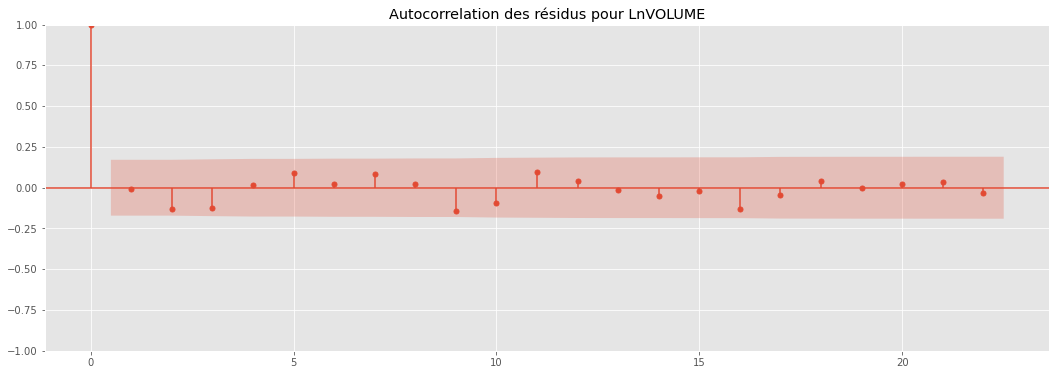

<Figure size 720x360 with 0 Axes>

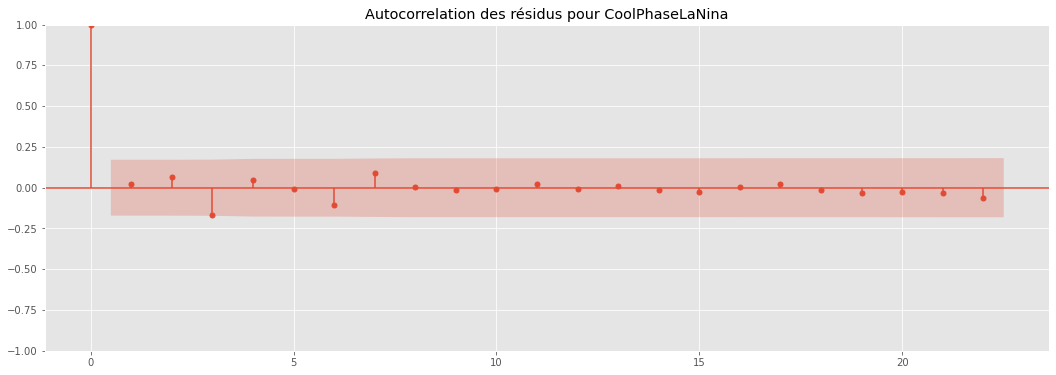

<Figure size 720x360 with 0 Axes>

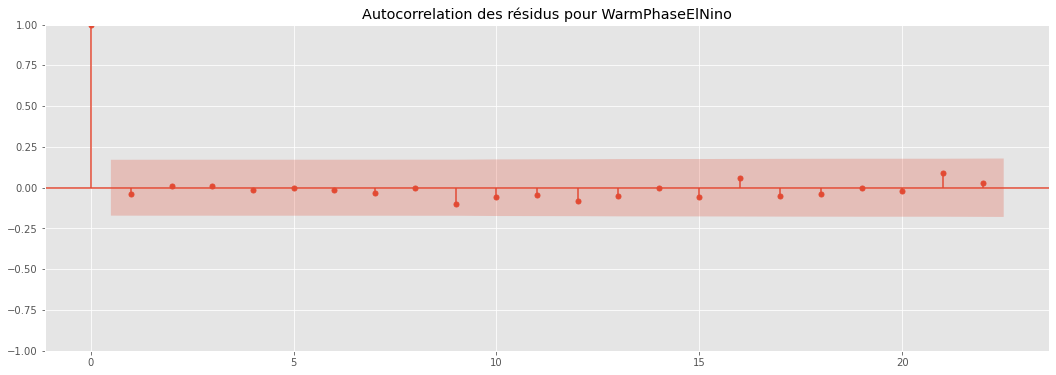

In [105]:
### model validation 
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf

# extracting model residuals
residuals = euvecm_modelfit.resid
# table creation for storing data
ljungboxtest_results = pd.DataFrame()

for i, column in enumerate(europe_vecm.columns):
# Ljung-box test for each lag from 1 to 12    
    for lag in range (1, 13) :
        ljung_box = acorr_ljungbox(residuals[:,i], lags = [lag], return_df =True)
# ajout des résultats au DataFrame
        ljungboxtest_results.loc [column, f'lag_{lag}'] =ljung_box['lb_pvalue'].values[0]
print (".......Résultats du test de Ljung_box")
print (ljungboxtest_results)

for i, column in enumerate(europe_vecm.columns) : 
    plt.figure(figsize=(10,5))
    plot_acf(residuals[:,i])
    plt.title(f'Autocorrelation des résidus pour {column}')
    plt.show()

In [106]:
## jarque bera test 
from scipy.stats import jarque_bera

jb_test = jarque_bera (residuals)
print ('......test deJarque Bera...')
print ('......statistique de test t', jb_test[0])
print ('......p-valeur :', jb_test[1])

......test deJarque Bera...
......statistique de test t 7115.756645574648
......p-valeur : 0.0


In [107]:
# Stability analyses
eigenvalues = euvecm_modelfit.alpha@euvecm_modelfit.beta.T
print ('----valeurs propres de la matrice de transition')
print (eigenvalues)


----valeurs propres de la matrice de transition
[[-1.33846824e-03  4.86384489e-02 -6.32332538e-02]
 [ 1.68805906e-02 -6.13421914e-01  7.97489731e-01]
 [ 4.96866313e-04 -1.80555699e-02  2.34734549e-02]]


conclusion : 
    nous validons notre modèle VECM , il est adapté. poure la série europe

### SOUTH AFRICA

In [108]:
# Order selection
from statsmodels.tsa.vector_ar.vecm import VECM, select_order
# best order selection 
sa_order = select_order(forex_Safrica[["LnVolume","CoolPhaseLaNina","WarmPhaseElNino"]].dropna(), maxlags=12, deterministic="ci",seasons=0)
sa_order.summary()


,AIC,BIC,FPE,HQIC
0,-15.59*,-15.26*,1.691e-07*,-15.46*
1,-15.56,-15.03,1.756e-07,-15.34
2,-15.53,-14.81,1.803e-07,-15.24
3,-15.52,-14.60,1.816e-07,-15.15
4,-15.43,-14.31,1.995e-07,-14.98
5,-15.35,-14.03,2.181e-07,-14.81
6,-15.24,-13.73,2.432e-07,-14.63
7,-15.16,-13.45,2.656e-07,-14.46
8,-15.41,-13.50,2.074e-07,-14.64
9,-15.35,-13.25,2.211e-07,-14.50


In [109]:
##### Model estimation 
safrica_vecm = forex_Safrica[["LnVolume","CoolPhaseLaNina","WarmPhaseElNino"]]
safrica_model = VECM(safrica_vecm , deterministic = "ci", seasons = 0, 
                   k_ar_diff =sa_order.selected_orders["aic"],# =12
                   coint_rank = SA_c_ranktest.rank)# =1
safrica_modelfit = safrica_model.fit()
safrica_modelfit.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
ec1,0.0003,0.000,1.156,0.248,-0.000,0.001
,coef,std err,z,P>|z|,[0.025,0.975]
ec1,0.0003,0.001,0.244,0.807,-0.002,0.003
,coef,std err,z,P>|z|,[0.025,0.975]
ec1,0.0085,0.001,11.995,0.000,0.007,0.010
,coef,std err,z,P>|z|,[0.025,0.975]
beta.1,1.0000,0,0,0.000,1.000,1.000
beta.2,-2.4442,3.707,-0.659,0.510,-9.709,4.821
beta.3,-118.1119,9.597,-12.307,0.000,-136.922,-99.302
const,-8.0064,0.823,-9.729,0.000,-9.619,-6.393


.......Résultats du test de Ljung_box
                    lag_1     lag_2     lag_3     lag_4     lag_5     lag_6  \
LnVolume         0.001745  0.004191  0.000021  0.000013  0.000008  0.000001   
CoolPhaseLaNina  0.999945  1.000000  0.026174  0.000958  0.002319  0.004971   
WarmPhaseElNino  0.889724  0.973649  0.992869  0.997908  0.999364  0.999803   

                        lag_7         lag_8         lag_9        lag_10  \
LnVolume         6.022719e-08  4.087747e-09  9.870059e-09  1.314303e-08   
CoolPhaseLaNina  9.676587e-03  1.728753e-02  2.903094e-02  4.596331e-02   
WarmPhaseElNino  9.999391e-01  9.999805e-01  9.999937e-01  9.999988e-01   

                       lag_11        lag_12  
LnVolume         1.395507e-08  3.163678e-08  
CoolPhaseLaNina  6.910406e-02  9.879733e-02  
WarmPhaseElNino  9.999998e-01  1.000000e+00  


<Figure size 720x360 with 0 Axes>

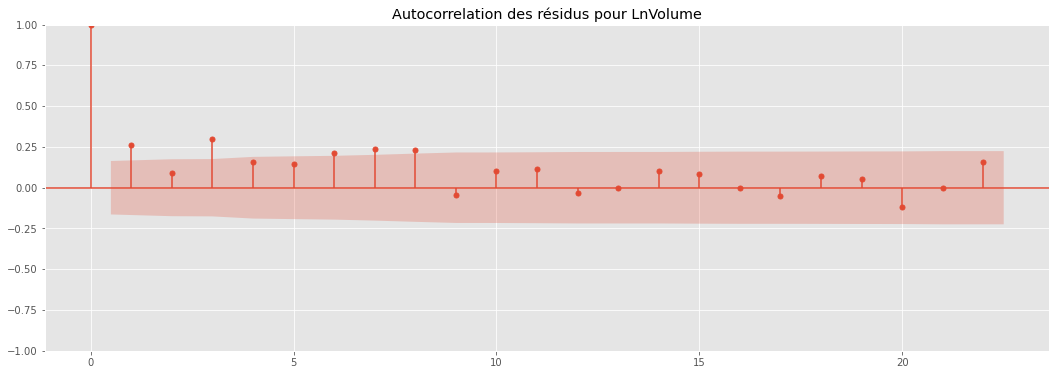

<Figure size 720x360 with 0 Axes>

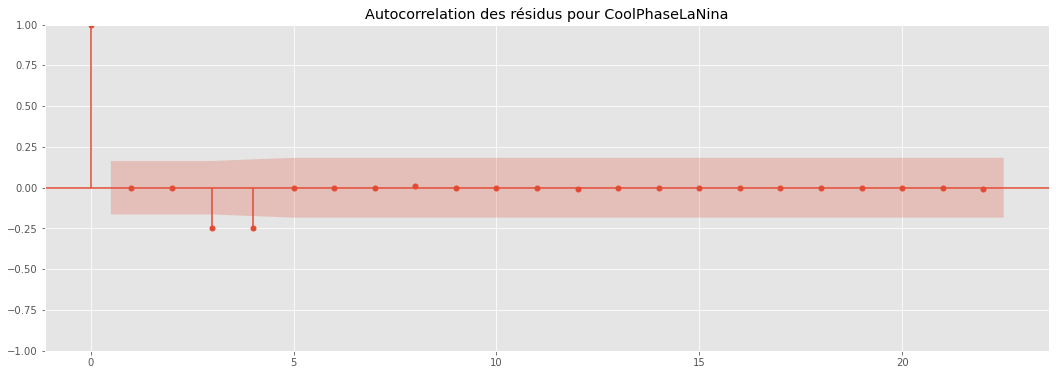

<Figure size 720x360 with 0 Axes>

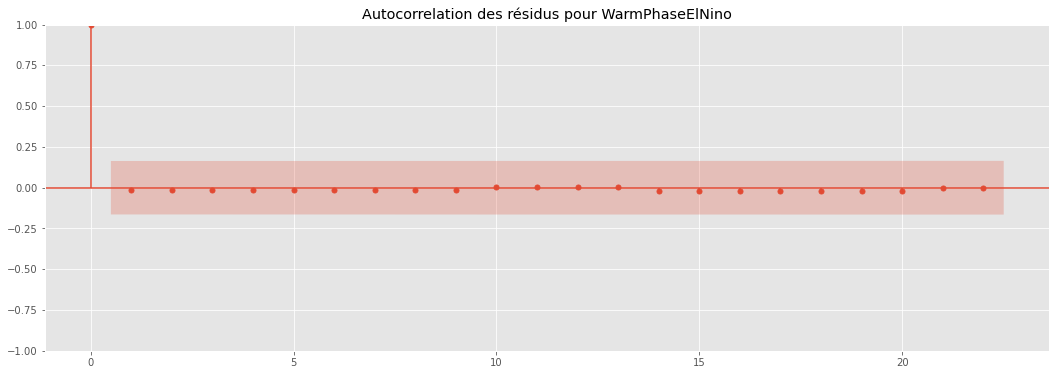

In [110]:
### model validation 
# extracting model residuals
residuals = safrica_modelfit.resid
# table creation for storing data
ljungboxtest_results = pd.DataFrame()

for i, column in enumerate(safrica_vecm.columns):
# Ljung-box test for each lag from 1 to 12    
    for lag in range (1, 13) :
        ljung_box = acorr_ljungbox(residuals[:,i], lags = [lag], return_df =True)
# ajout des résultats au DataFrame
        ljungboxtest_results.loc [column, f'lag_{lag}'] =ljung_box['lb_pvalue'].values[0]
print (".......Résultats du test de Ljung_box")
print (ljungboxtest_results)

for i, column in enumerate(safrica_vecm.columns) : 
    plt.figure(figsize=(10,5))
    plot_acf(residuals[:,i])
    plt.title(f'Autocorrelation des résidus pour {column}')
    plt.show()

In [111]:
# Stability analyses
eigenvalues =  safrica_modelfit.alpha@euvecm_modelfit.beta.T
print ('----valeurs propres de la matrice de transition')
print (eigenvalues)



----valeurs propres de la matrice de transition
[[ 2.84999993e-04 -1.03565832e-02  1.34642545e-02]
 [ 3.46211822e-04 -1.25809530e-02  1.63560848e-02]
 [ 8.49121645e-03 -3.08561374e-01  4.01150532e-01]]


In [112]:
## jarque bera test 
from scipy.stats import jarque_bera

jb_test = jarque_bera (residuals)
print ('......test deJarque Bera...')
print ('......statistique de test t', jb_test[0])
print ('......p-valeur :', jb_test[1])

......test deJarque Bera...
......statistique de test t 107289.48778393706
......p-valeur : 0.0


### AUSTRALIA

In [113]:
# Order selection
from statsmodels.tsa.vector_ar.vecm import VECM, select_order
# best order selection 
aust_order = select_order(forex_Australia[["LnVolume","CoolPhaseLaNina","WarmPhaseElNino"]].dropna(), maxlags=12, deterministic="ci",seasons=4)
aust_order.summary()


,AIC,BIC,FPE,HQIC
0,-9.731,-9.205*,5.941e-05,-9.517
1,-9.698,-8.974,6.146e-05,-9.404
2,-9.651,-8.729,6.451e-05,-9.277
3,-9.527,-8.407,7.320e-05,-9.072
4,-9.536,-8.219,7.276e-05,-9.000
5,-9.473,-7.959,7.776e-05,-8.858
6,-9.372,-7.660,8.647e-05,-8.676
7,-9.388,-7.479,8.559e-05,-8.612
8,-9.892,-7.785,5.213e-05,-9.036
9,-9.923,-7.618,5.105e-05,-8.986


In [114]:
##### Model estimation 
aust_vecm = forex_Australia[["LnVolume","CoolPhaseLaNina","WarmPhaseElNino"]]
aust_model = VECM(aust_vecm , deterministic = "ci", seasons = 0, 
                   k_ar_diff =aust_order.selected_orders["aic"],# =12
                   coint_rank = A_c_ranktest.rank)# =1
aust_modelfit = aust_model.fit()
aust_modelfit.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.LnVolume,-0.0890,0.085,-1.045,0.296,-0.256,0.078
L1.CoolPhaseLaNina,0.5678,0.375,1.516,0.130,-0.166,1.302
L1.WarmPhaseElNino,5.2228,1.295,4.032,0.000,2.684,7.761
L2.LnVolume,-0.0340,0.086,-0.396,0.692,-0.202,0.134
L2.CoolPhaseLaNina,-0.2314,0.373,-0.620,0.535,-0.963,0.500
L2.WarmPhaseElNino,5.1691,1.322,3.911,0.000,2.579,7.759
L3.LnVolume,-0.2530,0.084,-3.010,0.003,-0.418,-0.088
L3.CoolPhaseLaNina,-0.6405,0.351,-1.823,0.068,-1.329,0.048
L3.WarmPhaseElNino,5.1624,1.355,3.809,0.000,2.506,7.819
L4.LnVolume,-0.3240,0.085,-3.821,0.000,-0.490,-0.158


In [115]:
### CHILE

In [116]:
# Order selection
from statsmodels.tsa.vector_ar.vecm import VECM, select_order
# best order selection 
ch_order = select_order(forex_Chile[["LnVolume","CoolPhaseLaNina","WarmPhaseElNino"]].dropna(), maxlags=12, deterministic="ci",seasons=0)
ch_order.summary()


,AIC,BIC,FPE,HQIC
0,-20.20,-19.87,1.687e-09,-20.07
1,-21.44,-20.92*,4.871e-10,-21.23
2,-21.38,-20.66,5.194e-10,-21.09
3,-21.42,-20.50,4.976e-10,-21.05
4,-21.42,-20.30,4.994e-10,-20.97
5,-21.64,-20.32,4.021e-10,-21.11
6,-21.54,-20.03,4.447e-10,-20.93
7,-21.58,-19.86,4.328e-10,-20.88
8,-21.94,-20.03,3.043e-10,-21.16
9,-22.00,-19.89,2.887e-10,-21.14


In [117]:
##### Model estimation 
chi_vecm = forex_Chile[["LnVolume","CoolPhaseLaNina","WarmPhaseElNino"]]
chi_model = VECM(chi_vecm , deterministic = "ci", seasons = 0, 
                   k_ar_diff =ch_order.selected_orders["aic"],# =12
                   coint_rank = C_c_ranktest.rank)# =1
chi_modelfit = chi_model.fit()
chi_modelfit.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.LnVolume,1.0422,0.086,12.155,0.000,0.874,1.210
L1.CoolPhaseLaNina,0.0044,0.001,6.855,0.000,0.003,0.006
L1.WarmPhaseElNino,-0.0056,0.003,-1.781,0.075,-0.012,0.001
L2.LnVolume,0.2937,0.125,2.354,0.019,0.049,0.538
L2.CoolPhaseLaNina,-0.0021,0.001,-2.794,0.005,-0.004,-0.001
L2.WarmPhaseElNino,-0.0046,0.003,-1.493,0.136,-0.011,0.001
L3.LnVolume,-0.4941,0.132,-3.745,0.000,-0.753,-0.236
L3.CoolPhaseLaNina,1.223e-06,0.001,0.002,0.999,-0.002,0.002
L3.WarmPhaseElNino,-0.0027,0.003,-0.872,0.383,-0.009,0.003
L4.LnVolume,0.3994,0.127,3.151,0.002,0.151,0.648


### Test d'autocorrelation 

### GRANGER CAUSALITY TEST 

#### EUROPE

In [118]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller 
print ('\LaNina causes Low FOREXVOLUME\n')
print('........................')
granger_2 = grangercausalitytests(forex_Europe_var[["CoolPhas²eLaNina","LnVOLUME"]],4)

\LaNina causes Low FOREXVOLUME

........................


KeyError: "['CoolPhas²eLaNina'] not in index"

In [119]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller 
print ('\LaNina causes Low FOREXVOLUME\n')
print('........................')
granger_2 = grangercausalitytests(forex_Europe_var[["WarmPhaseElNino","LnVOLUME"]],4)

\LaNina causes Low FOREXVOLUME

........................

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6435  , p=0.4238  , df_denom=140, df_num=1
ssr based chi2 test:   chi2=0.6573  , p=0.4175  , df=1
likelihood ratio test: chi2=0.6558  , p=0.4181  , df=1
parameter F test:         F=0.6435  , p=0.4238  , df_denom=140, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4462  , p=0.6410  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=0.9250  , p=0.6297  , df=2
likelihood ratio test: chi2=0.9220  , p=0.6307  , df=2
parameter F test:         F=0.4462  , p=0.6410  , df_denom=137, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3079  , p=0.8197  , df_denom=134, df_num=3
ssr based chi2 test:   chi2=0.9718  , p=0.8081  , df=3
likelihood ratio test: chi2=0.9685  , p=0.8089  , df=3
parameter F test:         F=0.3079  , p=0.8197  , df_denom=134, df_num=3

Granger Causality
number of lags (no

In [120]:
#### SOUTH AFRICA 

In [121]:
print ('\LaNina causes Low FOREXVOLUME\n')
print('........................')
granger_2 = grangercausalitytests(forex_Safrica1[["CoolPhaseLaNina","LnVolume"]],2)

\LaNina causes Low FOREXVOLUME

........................

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8886  , p=0.3475  , df_denom=140, df_num=1
ssr based chi2 test:   chi2=0.9076  , p=0.3407  , df=1
likelihood ratio test: chi2=0.9048  , p=0.3415  , df=1
parameter F test:         F=0.8886  , p=0.3475  , df_denom=140, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7062  , p=0.4953  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=1.4640  , p=0.4809  , df=2
likelihood ratio test: chi2=1.4565  , p=0.4827  , df=2
parameter F test:         F=0.7062  , p=0.4953  , df_denom=137, df_num=2


In [122]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller 
print ('\LaNina causes Low FOREXVOLUME\n')
print('........................')
granger_2 = grangercausalitytests(forex_Safrica1[["WarmPhaseElNino","LnVolume"]],2)

\LaNina causes Low FOREXVOLUME

........................

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8422  , p=0.3603  , df_denom=140, df_num=1
ssr based chi2 test:   chi2=0.8603  , p=0.3537  , df=1
likelihood ratio test: chi2=0.8577  , p=0.3544  , df=1
parameter F test:         F=0.8422  , p=0.3603  , df_denom=140, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4302  , p=0.6513  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=0.8917  , p=0.6403  , df=2
likelihood ratio test: chi2=0.8889  , p=0.6412  , df=2
parameter F test:         F=0.4302  , p=0.6513  , df_denom=137, df_num=2


In [123]:
#### Australia 
print ('\LaNina causes Low FOREXVOLUME IN CHILE\n')
print('........................')
granger_2 = grangercausalitytests(forex_Chile1[["CoolPhaseLaNina","LnVolume"]],2)

\LaNina causes Low FOREXVOLUME IN CHILE

........................

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4928  , p=0.4839  , df_denom=140, df_num=1
ssr based chi2 test:   chi2=0.5033  , p=0.4780  , df=1
likelihood ratio test: chi2=0.5025  , p=0.4784  , df=1
parameter F test:         F=0.4928  , p=0.4839  , df_denom=140, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1109  , p=0.1251  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=4.3759  , p=0.1121  , df=2
likelihood ratio test: chi2=4.3098  , p=0.1159  , df=2
parameter F test:         F=2.1109  , p=0.1251  , df_denom=137, df_num=2


### GARCH MODEL CONSTRUCTION

Le modèle GARCH (Generalized Autoregressive Conditional Heteroskedasticity) est défini par l'équation suivante :

$$ \epsilon_t = \sigma_t \cdot z_t $$

$$ \sigma_t^2 = \omega + \sum_{i=1}^{p} \alpha_i \cdot \epsilon_{t-i}^2 + \sum_{j=1}^{q} \beta_j \cdot \sigma_{t-j}^2 $$

Où :
- $ \epsilon_t $ est le processus d'innovation à l'instant t
- $ \sigma_t^2 $ est la variance conditionnelle à l'instant t
- $ \omega $ est le terme constant (offset)
- $ \alpha_i $ sont les coefficients GARCH (mesures de la volatilité passée) pour les retards i
- $ \epsilon_{t-i}^2 $ sont les carrés des erreurs résiduelles aux instants t-i
- $ \beta_j $ sont les coefficients ARCH (mesures de l'hétéroscédasticité passée) pour les retards j
- $ \sigma_{t-j}^2 $ sont les variances conditionnelles aux instants t-j
- $ z_t $ est un bruit blanc gaussien standardisé à l'instant t


#### EUROPA

In [124]:
# Packages 
import statsmodels.graphics.tsaplots as sgt 
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from arch import arch_model
from arch.univariate import GARCH

In [125]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import arch
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import itertools
from scipy.stats import shapiro, jarque_bera
from statsmodels.stats.diagnostic import het_arch
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

In [126]:
data['EUROPA_r'] = data['EUROPA'].pct_change()
data['EUROPA_rr'] = data['EUROPA_r'] ** 2
data=data.dropna()

In [127]:
data['EUROPA_r'] = data['EUROPA'].pct_change()
data['EUROPA_rr'] = data['EUROPA_r'] ** 2
data=data.dropna()
# Définir le rang de p et q
p_range = range(1, 4)  
q_range = range(0, 4)  

# Initialiser le DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=['p', 'q', 'aic'])

# Boucle sur toutes les combinaisons possibles de p et q
for p in p_range:
    for q in q_range:
            # Spécifier le modèle GARCH
            model = arch_model(data['EUROPA_r'], vol='Garch', p=p, q=q)
            
            # Adapter le modèle
            results = model.fit(disp='off')  # turn off convergence messages

            # Obtenir l'AIC
            aic = results.aic

            # Ajouter les résultats dans le DataFrame
            results_df = results_df.append({'p': p, 'q': q, 'aic': aic}, ignore_index=True)
            results_df

In [128]:
 results_df 

,p,q,aic
0,1.0,0.0,1069.090694
1,1.0,1.0,982.612146
2,1.0,2.0,940.799325
3,1.0,3.0,917.478206
4,2.0,0.0,1071.090695
5,2.0,1.0,972.603864
6,2.0,2.0,974.603866
7,2.0,3.0,964.920443
8,3.0,0.0,1073.090694
9,3.0,1.0,961.874276


In [129]:
#The simply garch model EUROPA 
eugarch_11 = arch_model(data['EUROPA_r'][1:], mean = "Constant", vol ="GARCH", p = 1, q =1)
eugarch_11 = eugarch_11.fit(update_freq = 5)
eugarch_11.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 1168.1226521931803
Iteration:     10,   Func. Count:     58,   Neg. LLF: 484.8659244684826
Optimization terminated successfully    (Exit mode 0)
            Current function value: 484.8659244684826
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               EUROPA_r   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -484.866
Distribution:                  Normal   AIC:                           977.732
Method:            Maximum Likelihood   BIC:                           989.527
                                        No. Observations:                  141
Date:                Wed, Aug 16 2023   Df Residuals:                      140
Time:                        03:35:52   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.7339      0.345      2.127  3.345e-02 [5.752e-02,  1.410]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          5.6602      5.918      0.956      0.339    [ -5.938, 17.259]
alpha[1]       0.2121      0.138      1.539      0.124 [-5.801e-02,  0.482]
beta[1]        0.7879  4.386e-02     17.964  3.698e-72    [  0.702,  0.874]
===========================================================================

Covariance estimator: robust
"""

Statistique de Shapiro-Wilk: 0.13852155208587646, p-value: 3.189926210165455e-25


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



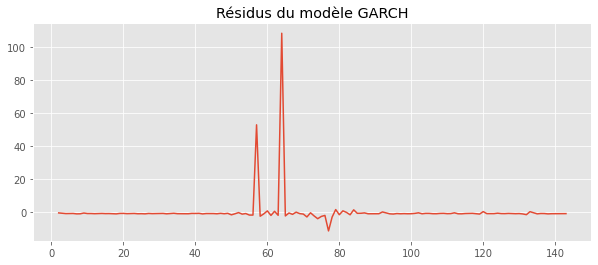

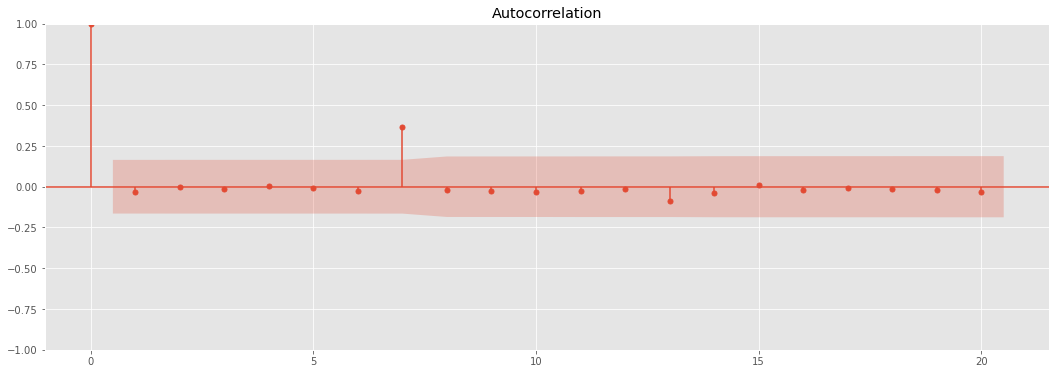

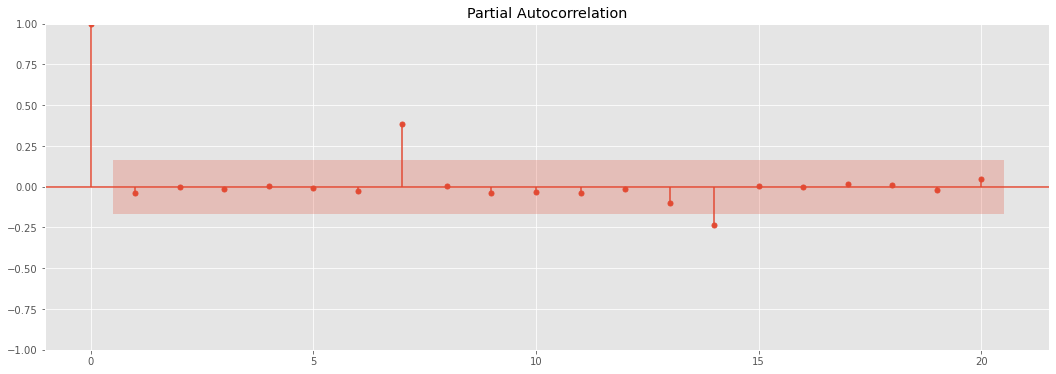

In [130]:
# Plot des résidus
plt.figure(figsize=(10,4))
plt.plot(results.resid)
plt.title("Résidus du modèle GARCH")

# ACF et PACF
plot_acf(results.resid, lags=20)
plot_pacf(results.resid, lags=20)

# Test de Shapiro-Wilk pour la normalité
stat, p = shapiro(results.resid)
print(f'Statistique de Shapiro-Wilk: {stat}, p-value: {p}')

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



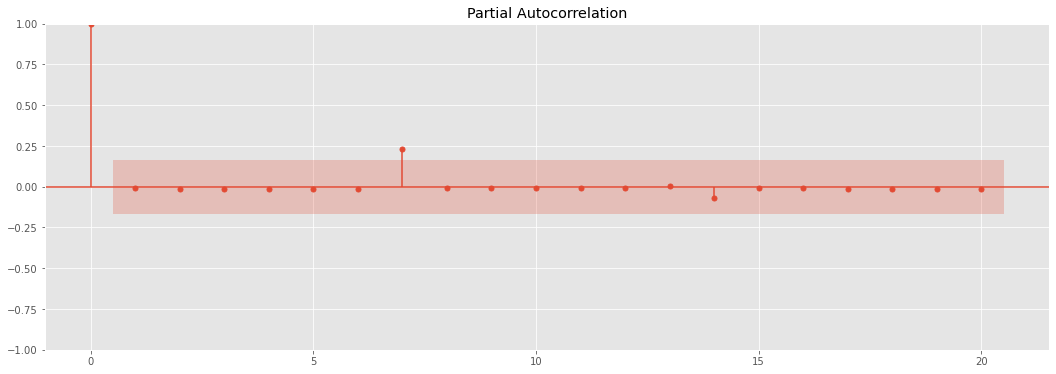

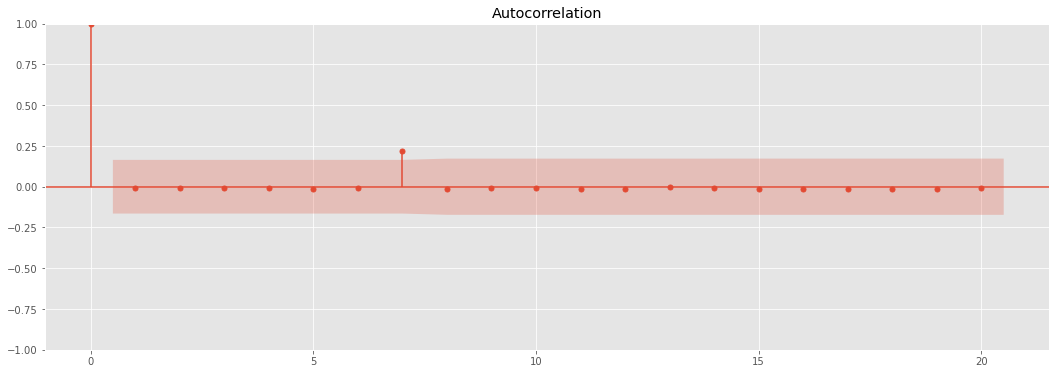

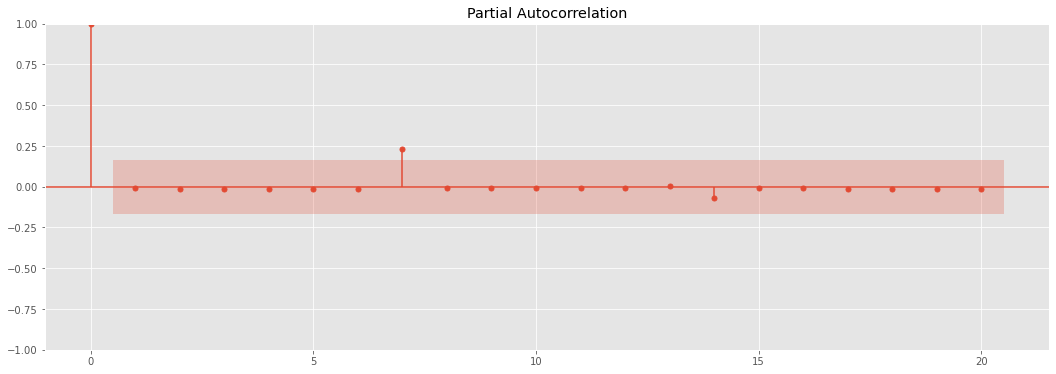

In [131]:
# Analyse du carré des résidus

# ACF et PACF des carrés des résidus
plot_acf(results.resid**2, lags=20)
plot_pacf(results.resid**2, lags=20)



In [132]:
# Ljung-Box test sur résidus
lb_test_resid = acorr_ljungbox(results.resid, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur résidus:\n", lb_test_resid)

# Ljung-Box test sur carrés des résidus
lb_test_resid_sq = acorr_ljungbox(results.resid**2, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur carrés des résidus:\n", lb_test_resid_sq)

Ljung-Box Test sur résidus:
       lb_stat  lb_pvalue
1    0.181571   0.670027
2    0.181628   0.913188
3    0.206101   0.976598
4    0.207144   0.994993
5    0.211819   0.998981
6    0.324026   0.999372
7   20.585979   0.004434
8   20.638275   0.008173
9   20.756752   0.013775
10  20.947599   0.021462
11  21.034610   0.033014
12  21.064848   0.049439
Ljung-Box Test sur carrés des résidus:
      lb_stat  lb_pvalue
1   0.014455   0.904303
2   0.031350   0.984447
3   0.047589   0.997278
4   0.065094   0.999482
5   0.083065   0.999897
6   0.099786   0.999980
7   7.281712   0.400149
8   7.300171   0.504620
9   7.318018   0.604046
10  7.334087   0.693573
11  7.352766   0.769839
12  7.372890   0.832020


##### Test de Lagrange Multiplier (LM) pour l'effet ARCH

The Lagrange Multiplier (LM) test for the ARCH effect is a statistical tool that checks for the presence of ARCH (AutoRegressive Conditional Heteroskedasticity) effects in a time series.



The ARCH effect occurs when the variance of an error is a function of its past errors. This property is common in financial time series, where large variations in returns are often followed by large variations and vice versa.

The LM test verifies the null hypothesis that errors are homoscedastic (constant variance). If the p-value of the test is below a predefined threshold (usually 0.05), the null hypothesis is rejected, indicating the presence of ARCH effects.


In [133]:

# LM test pour les effets ARCH
lm_test = het_arch(results.resid)
print('LM Test Statistique: %.3f, p-value: %.3f' % (lm_test[0], lm_test[1]))

LM Test Statistique: 6.337, p-value: 0.786


#### South Africa

In [134]:
data['SOUTH_AFRICA_r'] = data['SOUTH_AFRICA'].pct_change()
data['SOUTH_AFRICA_rr'] = data['SOUTH_AFRICA_r'] ** 2
data=data.dropna()
# Définir le rang de p et q
p_range = range(1, 4)  
q_range = range(0, 4)  

# Initialiser le DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=['p', 'q', 'aic'])

# Boucle sur toutes les combinaisons possibles de p et q
for p in p_range:
    for q in q_range:
            # Spécifier le modèle GARCH
            model = arch_model(data['SOUTH_AFRICA_rr'], vol='Garch', p=p, q=q)
            
            # Adapter le modèle
            results = model.fit(disp='off')  # turn off convergence messages

            # Obtenir l'AIC
            aic = results.aic

            # Ajouter les résultats dans le DataFrame
            results_df = results_df.append({'p': p, 'q': q, 'aic': aic}, ignore_index=True)
            results_df

In [135]:
#The simply garch model SOUTH AFRICA 
sagarch_11 = arch_model(data['SOUTH_AFRICA_rr'][1:], mean = "Constant", vol ="GARCH", p = 1, q =1)
sagarch_11 = sagarch_11.fit(update_freq = 5)
sagarch_11.summary()

Iteration:      5,   Func. Count:     31,   Neg. LLF: 94.80036250155618
Iteration:     10,   Func. Count:     65,   Neg. LLF: 7564.041057538854
Iteration:     15,   Func. Count:     98,   Neg. LLF: 184.12055761021338
Iteration:     20,   Func. Count:    132,   Neg. LLF: 108.00288120706122
Iteration:     25,   Func. Count:    161,   Neg. LLF: 82.98342132095476
Iteration:     30,   Func. Count:    196,   Neg. LLF: 82.86766918779865
Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.86766918651753
            Iterations: 34
            Function evaluations: 196
            Gradient evaluations: 30


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:        SOUTH_AFRICA_rr   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -82.8677
Distribution:                  Normal   AIC:                           173.735
Method:            Maximum Likelihood   BIC:                           185.502
                                        No. Observations:                  140
Date:                Wed, Aug 16 2023   Df Residuals:                      139
Time:                        03:35:54   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0433  2.587e-02      1.673  9.430e-02 [-7.421e-03,9.400e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.9459e-03  3.040e-03      3.272  1.068e-03  [3.988e-03,1.590e-02]
alpha[1]   1.5293e-11  4.193e-03  3.647e-09      1.000 [-8.219e-03,8.219e-03]
beta[1]        0.9578  3.216e-02     29.781 6.857e-195      [  0.895,  1.021]
=============================================================================

Covariance estimator: robust
"""

In [136]:
# Ljung-Box test sur résidus
lb_test_resid = acorr_ljungbox(results.resid, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur résidus:\n", lb_test_resid)

# Ljung-Box test sur carrés des résidus
lb_test_resid_sq = acorr_ljungbox(results.resid**2, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur carrés des résidus:\n", lb_test_resid_sq)


Ljung-Box Test sur résidus:
      lb_stat  lb_pvalue
1   0.612643   0.433794
2   0.722457   0.696820
3   0.927781   0.818719
4   0.931510   0.919997
5   0.947487   0.966689
6   0.955972   0.987226
7   1.010756   0.994653
8   1.010804   0.998179
9   1.027305   0.999372
10  1.033510   0.999800
11  1.039488   0.999939
12  1.058733   0.999981
Ljung-Box Test sur carrés des résidus:
      lb_stat  lb_pvalue
1   0.003577   0.952310
2   0.010170   0.994928
3   0.015550   0.999487
4   0.023746   0.999930
5   0.031994   0.999990
6   0.040464   0.999999
7   0.048323   1.000000
8   0.057232   1.000000
9   0.066188   1.000000
10  0.075441   1.000000
11  0.084933   1.000000
12  0.094486   1.000000


In [137]:
# LM test pour les effets ARCH
lm_test = het_arch(results.resid)
print('LM Test Statistique: %.3f, p-value: %.3f' % (lm_test[0], lm_test[1]))

LM Test Statistique: 0.076, p-value: 1.000


#### AUSTRALIA

In [138]:
data['AUSTRALIA_r'] = data['AUSTRALIA'].pct_change()
data=data.dropna()
# Définir le rang de p et q
p_range = range(1, 4)  
q_range = range(0, 4)  

# Initialiser le DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=['p', 'q', 'aic'])

# Boucle sur toutes les combinaisons possibles de p et q
for p in p_range:
    for q in q_range:
            # Spécifier le modèle GARCH
            model = arch_model(data['AUSTRALIA_r'], vol='Garch', p=p, q=q)
            
            # Adapter le modèle
            results = model.fit(disp='off')  # turn off convergence messages

            # Obtenir l'AIC
            aic = results.aic

            # Ajouter les résultats dans le DataFrame
            results_df = results_df.append({'p': p, 'q': q, 'aic': aic}, ignore_index=True)
            results_df

In [139]:
#The simply garch model AUSTRALIA 
augarch_11 = arch_model(data['AUSTRALIA_r'][1:], mean = "Constant", vol ="GARCH", p = 1, q =1)
augarch_11 = augarch_11.fit(update_freq = 5)
augarch_11.summary()

Iteration:      5,   Func. Count:     29,   Neg. LLF: 499.48470363930625
Iteration:     10,   Func. Count:     57,   Neg. LLF: 497.532097412997
Optimization terminated successfully    (Exit mode 0)
            Current function value: 497.53061723619317
            Iterations: 14
            Function evaluations: 66
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:            AUSTRALIA_r   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -497.531
Distribution:                  Normal   AIC:                           1003.06
Method:            Maximum Likelihood   BIC:                           1014.80
                                        No. Observations:                  139
Date:                Wed, Aug 16 2023   Df Residuals:                      138
Time:                        03:35:54   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3102      0.247      1.256      0.209 [ -0.174,  0.794]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.4216      1.443      0.985      0.325      [ -1.407,  4.250]
alpha[1]       0.0000  7.131e-03      0.000      1.000 [-1.398e-02,1.398e-02]
beta[1]        1.0000  3.609e-03    277.085      0.000      [  0.993,  1.007]
=============================================================================

Covariance estimator: robust
"""

In [140]:
# Ljung-Box test sur résidus
lb_test_resid = acorr_ljungbox(results.resid, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur résidus:\n", lb_test_resid)

# Ljung-Box test sur carrés des résidus
lb_test_resid_sq = acorr_ljungbox(results.resid**2, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur carrés des résidus:\n", lb_test_resid_sq)


Ljung-Box Test sur résidus:
      lb_stat  lb_pvalue
1   0.017170   0.895748
2   0.030021   0.985101
3   0.042322   0.997714
4   0.042322   0.999779
5   0.046357   0.999976
6   0.047203   0.999998
7   0.064375   0.999999
8   0.069878   1.000000
9   0.078400   1.000000
10  0.085385   1.000000
11  0.089620   1.000000
12  0.100895   1.000000
Ljung-Box Test sur carrés des résidus:
      lb_stat  lb_pvalue
1   0.007444   0.931245
2   0.015164   0.992447
3   0.023065   0.999075
4   0.030955   0.999881
5   0.039091   0.999984
6   0.047478   0.999998
7   0.056033   1.000000
8   0.064844   1.000000
9   0.073832   1.000000
10  0.082972   1.000000
11  0.092364   1.000000
12  0.101924   1.000000


In [141]:
# LM test pour les effets ARCH
lm_test = het_arch(results.resid)
print('LM Test Statistique: %.3f, p-value: %.3f' % (lm_test[0], lm_test[1]))

LM Test Statistique: 0.084, p-value: 1.000


#### CHILE 

In [142]:
data['CHILE_r'] = data['CHILE'].pct_change()
data=data.dropna()
# Définir le rang de p et q
p_range = range(1, 4)  
q_range = range(0, 4)  

# Initialiser le DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=['p', 'q', 'aic'])

# Boucle sur toutes les combinaisons possibles de p et q
for p in p_range:
    for q in q_range:
            # Spécifier le modèle GARCH
            model = arch_model(data['CHILE_r'], vol='Garch', p=p, q=q)
            
            # Adapter le modèle
            results = model.fit(disp='off')  # turn off convergence messages

            # Obtenir l'AIC
            aic = results.aic

            # Ajouter les résultats dans le DataFrame
            results_df = results_df.append({'p': p, 'q': q, 'aic': aic}, ignore_index=True)
            results_df

C:\Users\dell\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.




In [143]:
#The simply garch model CHILE
chgarch_11 = arch_model(data['CHILE_r'][1:], mean = "Constant", vol ="GARCH", p = 1, q =1)
chgarch_11 = chgarch_11.fit(update_freq = 5)
chgarch_11.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: -240.34043820585165
Optimization terminated successfully    (Exit mode 0)
            Current function value: -240.34043888766382
            Iterations: 9
            Function evaluations: 41
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                CHILE_r   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                240.340
Distribution:                  Normal   AIC:                          -472.681
Method:            Maximum Likelihood   BIC:                          -460.972
                                        No. Observations:                  138
Date:                Wed, Aug 16 2023   Df Residuals:                      137
Time:                        03:35:56   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -5.7163e-03  3.105e-03     -1.841  6.566e-02 [-1.180e-02,3.702e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      8.6672e-04  1.377e-04      6.294  3.096e-10 [5.968e-04,1.137e-03]
alpha[1]       1.0000      0.354      2.822  4.776e-03     [  0.305,  1.695]
beta[1]    2.0667e-05  8.401e-02  2.460e-04      1.000     [ -0.165,  0.165]
============================================================================

Covariance estimator: robust
"""

In [144]:
# Ljung-Box test sur résidus
lb_test_resid = acorr_ljungbox(results.resid, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur résidus:\n", lb_test_resid)

# Ljung-Box test sur carrés des résidus
lb_test_resid_sq = acorr_ljungbox(results.resid**2, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur carrés des résidus:\n", lb_test_resid_sq)

Ljung-Box Test sur résidus:
      lb_stat  lb_pvalue
1   0.502520   0.478395
2   0.799691   0.670424
3   1.176209   0.758716
4   1.453528   0.834840
5   1.636912   0.896750
6   1.738654   0.942098
7   1.749053   0.972417
8   1.750559   0.987727
9   1.767253   0.994636
10  1.779769   0.997766
11  1.789385   0.999110
12  1.789751   0.999667
Ljung-Box Test sur carrés des résidus:
      lb_stat  lb_pvalue
1   5.513357   0.018872
2   5.653646   0.059201
3   5.656760   0.129558
4   5.661576   0.225888
5   5.675201   0.339117
6   5.692407   0.458513
7   5.711249   0.573840
8   5.730448   0.677396
9   5.748784   0.764774
10  5.765409   0.834572
11  5.780192   0.887620
12  5.794687   0.926076


In [145]:
# LM test pour les effets ARCH
lm_test = het_arch(results.resid)
print('LM Test Statistique: %.3f, p-value: %.3f' % (lm_test[0], lm_test[1]))

LM Test Statistique: 5.035, p-value: 0.889


### Partie 7 : METHODES D'ANALYSE

### 1 - Binning method

In [146]:
# classes années 
def yeargroup(x):
    if x < 2005 : 
        return '2001_2004'
    elif x< 2009 :
        return '2005_2008'
    else  : 
        return '2009-2012'
   
    
# catégories de classes d'années 
genius['YEAR CATEGORY'] = genius['Year'].apply(yeargroup)
genius.head()

NameError: name 'genius' is not defined

In [147]:
#tri croisé entre Phase et year category 
pd.crosstab(genius["YEAR CATEGORY"],genius["Phase"])

NameError: name 'genius' is not defined

In [148]:
# Identifier le nombre de jours où la temp excède les 86°F par moi
pd.crosstab(genius.Phase,  genius.Monthname)

NameError: name 'genius' is not defined

In [149]:
#panel b codes 1
STAT1  = genius.groupby(["YEAR CATEGORY","Phase"] ).agg({"VOLUME" :'count'})
STAT2  = genius.groupby(["YEAR CATEGORY","Phase"] ).agg({"VOLUME" : np.std})
STAT3  = genius.groupby(["YEAR CATEGORY","Phase"] ).agg({"VOLUME" : np.mean})
STAT4  = genius.groupby(["YEAR CATEGORY","Phase"] ).agg({"LnVOLUME":np.mean})

# Différentes fusions des stats
livrable_pivots=pd.merge(STAT1,STAT2,on=["YEAR CATEGORY","Phase"],how="left")
livrable_pivots=pd.merge(livrable_pivots,STAT3,on=["YEAR CATEGORY","Phase"],how="left")
livrable_pivots=pd.merge(livrable_pivots,STAT4,on=["YEAR CATEGORY","Phase"],how="left")

def livrableC (livrable_pivots,var1, var2,var3,var4):
    livrable_pivots = livrable_pivots.rename(columns={var1 : "N",var2 : "s.d_VOLUME",var3 : "Mean_VOLUME",var4 : "Mean_LnVOLUME"},inplace=True)
livrableC(livrable_pivots,'VOLUME_x','VOLUME_y','VOLUME','LnVOLUME')
livrable_pivots

NameError: name 'genius' is not defined